#The Spotify Tracks Dataset:

###This is a dataset of Spotify tracks over a range of 114 different genres. Each track is associated with the following features including the artist, track name, and various audio features. We decided to focus on predicting `track_genre` given the dataset's numerical features while setting aside the categorical features like `artists`, `album_name`, and `track_name` which may not be as informative.

</br>

`track_id`: The Spotify ID for the track

`artists`: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

`album_name`: The album name in which the track appears

`track_name`: Name of the track

`popularity`: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

`duration_ms`: The track length in milliseconds

`explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

`danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

`energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

`key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

`loudness`: The overall loudness of a track in decibels (dB)

`mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

`speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

`acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

`liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

`valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

`tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

`time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

`track_genre`: The genre in which the track belongs


#I. Data Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [ ]:
# Load the dataset
df_raw = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Examine the first 10 rows (song tracks)
df_raw.head(10)

Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Soundtrack)   
4                                                 Hold On   
5                                    Days I Will Remember   
6                             Is There Anybody Out There?   
7                     We Sing. We Dance. We Steal Things.   
8                     We Sing. We Dance. We Steal Things.   
9                                                  Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580   0.7150   87.917               4    acoustic  
1          0.000006    0.1010   0.2670   77.489               4    acoustic  
2          0.000000    0.1170   0.1200   76.332               4    acoustic  
3          0.000071    0.1320   0.1430  181.740               3    acoustic  
4          0.000000    0.0829   0.1670  119.949               4    acoustic  
5          0.000000    0.1890   0.6660   98.017               4    acoustic  
6          0.000003    0.0913   0.0765  141.284               3    acoustic  
7          0.000000    0.0973   0.7120  150.960               4    acoustic  
8          0.000000    0.1510   0.6690  130.088               4    acoustic  
9          0.004190    0.0735   0.1960   78.899               4    acoustic

In [ ]:
# Examine a random sample of 10 rows (song tracks)
df_raw.sample(n=10)

Unnamed: 0                track_id                     artists  \
60963        60963  1tHr983oEofzquY1pgrImX                    Alkaline   
28418        28418  3cBbeY7DCckx8eEQ70AM5y              ILLENIUM;Echos   
2137          2137  12sPGeSWgxY2zpPupFYIrZ                     Volbeat   
29072        29072  5kkGFMcYcX1h3sQkyJcLHo  Culture Code;Amanda Collis   
49632        49632  6ra25IjyymNXs7FIurUj5o          D-Block & S-te-Fan   
52678        52678  2hGj5iz7i5Vsle1O9QYGol  George Jones;Tammy Wynette   
15316        15316  4dRb7kdtBVBFzSiCqsY7wP               Devin Kennedy   
1071          1071  3169PUGpN64JNpAhR5PW4Y       Los Amigos Invisibles   
29028        29028  0pzGsgrMvEtHZW6XzpY6Cs   Miles Away;Claire Ridgely   
113096      113096  1lBwL3aelajbfCPVoaShv3               Planetshakers   

                         album_name                      track_name  \
60963                         Wifey                           Wifey   
28418                        ASCEND  Every Piece Of Me (with Echos)   
2137    Halloween Spooky Party 2022             Sorry Sack Of Bones   
29072                     Fairytale                       Fairytale   
49632            Music Made Addictz              Dreamers Of Dreamz   
52678                We Go Together           Livin' On Easy Street   
15316                        Poetry                Forget About You   
1071            Super Pop Venezuela                Amar Es Algo Más   
29028                 Bring Me Back                   Bring Me Back   
113096      This Is Our Time (Live)         This Is Our Time - Live   

        popularity  duration_ms  explicit  danceability  energy  key  \
60963           19       169157      True         0.611   0.792    5   
28418           43       223404     False         0.343   0.321    7   
2137             0       228666      True         0.407   0.954    7   
29072           48       193000     False         0.644   0.628    5   
49632           21       243082     False         0.552   0.921   10   
52678           11       140266     False         0.678   0.443    7   
15316           62       151712     False         0.627   0.525   11   
1071            36       426306     False         0.692   0.746    7   
29028           52       219000     False         0.495   0.619    8   
113096          52       228293     False         0.575   0.947    8   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
60963     -5.486     1       0.3060      0.170000          0.000000    0.0779   
28418     -9.530     0       0.0357      0.514000          0.000505    0.2320   
2137      -3.753     1       0.0532      0.000629          0.186000    0.0545   
29072     -6.765     1       0.0544      0.033400          0.000000    0.1730   
49632     -5.881     0       0.0400      0.000758          0.802000    0.2590   
52678    -13.291     1       0.0273      0.782000          0.000000    0.0881   
15316     -8.003     0       0.0635      0.892000          0.000233    0.1090   
1071      -6.359     0       0.0362      0.393000          0.000496    0.2570   
29028     -4.774     1       0.0317      0.164000          0.000002    0.1180   
113096    -4.310     1       0.1800      0.001670          0.000000    0.7240   

        valence    tempo  time_signature  track_genre  
60963     0.851  105.256               4      j-dance  
28418     0.440  119.096               5          dub  
2137      0.454  171.988               4     alt-rock  
29072     0.448   97.042               4      dubstep  
49632     0.193  147.994               4    hardstyle  
52678     0.882   88.407               4   honky-tonk  
15316     0.207   98.080               4        chill  
1071      0.613  107.981               4     afrobeat  
29028     0.250  139.988               4      dubstep  
113096    0.377  128.027               4  world-music

In [ ]:
# Examine the number of features and observations
df_raw.shape

(114000, 21)

## Checking for feature relevance, duplicates, and missing data:

In [ ]:
# Examine features given by the dataset
df_raw.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
# Examine feature data types and missingness
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We see that the datset has 114000 samples for 21 features with the only missing data being `artists`, `album_name`, and `track_name` each having 1 null observation. Since this is not many observations, it is safe to just drop them.

In [ ]:
df_raw.dropna(axis=0,inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [ ]:
# Ensuring that 'track_id' and 'Unnamed: 0" are entirely arbitrary
print("track_id: ",df_raw.track_id.nunique(), "/",113999)
print("Unnamed: 0: ",df_raw['Unnamed: 0'].nunique(), "/",113999)

track_id:  89740 / 113999
Unnamed: 0:  113999 / 113999


The feature `Unnamed: 0` is unique per track, thus, can be removed. However, `track_id` seems to have duplicates, perhaps in terms of nominal variables like `explicit`, `mode`, `key`, or `track_genre` since there can be different versions of the same song in terms of these variables. We will isolate each feature as a potential explanation for the duplicates.

In [ ]:
# Dropping the feature 'Unnamed: 0"
df_raw.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Sample the first 20 rows that have duplicated track IDs
dup_tracks = df_raw[df_raw.duplicated(subset=['track_id'], keep=False)].sort_values(by='track_id')
dup_tracks.head(20)

track_id                       artists  \
15028   001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby   
103211  001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby   
85578   001YQlnDSduXd5LgBd66gT                   Soda Stereo   
100420  001YQlnDSduXd5LgBd66gT                   Soda Stereo   
91801   003vvx7Niy0yvhvHt4a68B                   The Killers   
3257    003vvx7Niy0yvhvHt4a68B                   The Killers   
2106    003vvx7Niy0yvhvHt4a68B                   The Killers   
33178   004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu   
94239   004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu   
97533   006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
77391   006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
35138   006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
112131  006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
64662   006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
62346   006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
63142   006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
64246   00970cTs7LnxWt0d5Qk08m               Ella Fitzgerald   
8095    00970cTs7LnxWt0d5Qk08m               Ella Fitzgerald   
71588   00B7SBwrjbycLMOgAmeIU8         Red Hot Chili Peppers   
2870    00B7SBwrjbycLMOgAmeIU8         Red Hot Chili Peppers   

                             album_name  \
15028                           New RnB   
103211                          New RnB   
85578          Soda Stereo (Remastered)   
100420         Soda Stereo (Remastered)   
91801                          Hot Fuss   
3257                           Hot Fuss   
2106                           Hot Fuss   
33178                      Loners Diary   
94239                      Loners Diary   
97533   CP 25 Anos (Ao Vivo em Aracaju)   
77391   CP 25 Anos (Ao Vivo em Aracaju)   
35138   CP 25 Anos (Ao Vivo em Aracaju)   
112131        Bezginin Gizli Mektupları   
64662         Bezginin Gizli Mektupları   
62346         Bezginin Gizli Mektupları   
63142         Bezginin Gizli Mektupları   
64246             Weihnachtslieder 2022   
8095              Weihnachtslieder 2022   
71588       Return of the Dream Canteen   
2870        Return of the Dream Canteen   

                                      track_name  popularity  duration_ms  \
15028                                     Better           0       176320   
103211                                    Better           0       176320   
85578   El Tiempo Es Dinero - Remasterizado 2007          38       177266   
100420  El Tiempo Es Dinero - Remasterizado 2007          38       177266   
91801                             Mr. Brightside          86       222973   
3257                              Mr. Brightside          86       222973   
2106                              Mr. Brightside          86       222973   
33178                                   Lovemark          58       219482   
94239                                   Lovemark          58       219482   
97533             Agora Estou Sofrendo - Ao Vivo          47       260510   
77391             Agora Estou Sofrendo - Ao Vivo          47       260510   
35138             Agora Estou Sofrendo - Ao Vivo          47       260510   
112131                        Yemyeşil Bir Deniz          44       358173   
64662                         Yemyeşil Bir Deniz          44       358173   
62346                         Yemyeşil Bir Deniz          44       358173   
63142                         Yemyeşil Bir Deniz          44       358173   
64246                                Sleigh Ride           0       175986   
8095                                 Sleigh Ride           0       175986   
71588                                  Reach Out          66       251588   
2870                                   Reach Out          66       251588   

        explicit  danceability  energy  key  loudness  mode  speechiness  \
15028      False         0.613   0.471    1    -6.644     0       0.1070   
103

In [ ]:
# number of complete duplicates
dup_num = dup_tracks[dup_tracks.duplicated(keep=False)].shape[0]
dup_num

894

In [ ]:
# Dropping the feature 'track_id"
df_raw.drop('track_id', axis=1, inplace=True)

# Remove the duplicates
df_raw.drop_duplicates(inplace=True)

In [ ]:
print("number of duplicates in terms of all other features except for...")
cols_to_check = list(dup_tracks.columns)
dup_cols = list(dup_tracks.columns)
for i  in cols_to_check:
  dup_cols.remove(i)
  print(i,': ', dup_tracks[dup_tracks.duplicated(subset=dup_cols, keep=False)].shape[0]-dup_num)
  dup_cols.append(i)

number of duplicates in terms of all other features except for...
track_id :  151
artists :  0
album_name :  0
track_name :  0
popularity :  0
duration_ms :  0
explicit :  0
danceability :  0
energy :  0
key :  0
loudness :  0
mode :  0
speechiness :  0
acousticness :  0
instrumentalness :  0
liveness :  0
valence :  0
tempo :  0
time_signature :  0
track_genre :  38948


The duplicates seems to be the exact same tracks listed under either multiple genres (38948 of these) or listed under different track IDs (151). We will remove the tracks with duplicated track_IDs but keep the tracks listed under multiple genres since `track_genre` is our response variable.

In [ ]:
print("number of duplicates in terms of all other features except for...")
cols_to_check = list(df_raw.columns)
dup_cols = list(df_raw.columns)
for i  in cols_to_check:
  dup_cols.remove(i)
  print(i,': ', df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].shape[0])
  dup_cols.append(i)

number of duplicates in terms of all other features except for...
artists :  0
album_name :  9238
track_name :  2
popularity :  293
duration_ms :  0
explicit :  0
danceability :  0
energy :  0
key :  0
loudness :  0
mode :  0
speechiness :  0
acousticness :  0
instrumentalness :  0
liveness :  0
valence :  0
tempo :  2
time_signature :  0
track_genre :  38967


There are tracks that are exactly the same but received different `popularity` ratings. According to the features documentation, `popularity` is "calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are." In order to reflect the performance of the tracks, we will keep the observation with the highest popularity rating and remove the remaining duplicates.

In [ ]:
# sort in descending order by popularity
df_raw.sort_values(by='popularity',ascending=False).head(20)

# keep only the first occurance of the duplicate (i.e. observation with the max popularity value)
dup_cols = list(df_raw.columns)
dup_cols.remove('popularity')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

There are also tracks with the exact same values for all features except `track_name`, `album_name`, and `tempo`. We will examine these duplications to ensure it is fair to remove their duplicates.

In [ ]:
# same track under different names??
dup_cols = list(df_raw.columns)
dup_cols.remove('track_name')
df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].head(10)

artists                        album_name           track_name  \
49371  UVIQUE  InfeXious Euphoric - Chapter One              Falling   
49376  UVIQUE  InfeXious Euphoric - Chapter One  Falling - Radio Mix   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
49371           0       178374     False          0.43   0.781    3    -5.601   
49376           0       178374     False          0.43   0.781    3    -5.601   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
49371     1       0.0334        0.0108             0.734    0.0818    0.206   
49376     1       0.0334        0.0108             0.734    0.0818    0.206   

        tempo  time_signature track_genre  
49371  75.017               4   hardstyle  
49376  75.017               4   hardstyle

In [ ]:
# same track under different album names??
dup_cols = list(df_raw.columns)
dup_cols.remove('album_name')
df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].head(10)

artists                          album_name  \
26                Jason Mraz               Holly Jolly Christmas   
28                Jason Mraz                      Christmas Time   
29                Jason Mraz              Perfect Christmas Hits   
30                Jason Mraz                     Merry Christmas   
31                Jason Mraz      Christmas Music - Holiday Hits   
33  Brandi Carlile;Sam Smith        Human - Best Adult Pop Tunes   
34  Brandi Carlile;Sam Smith  Feeling Good - Adult Pop Favorites   
35  Brandi Carlile;Sam Smith                   Mellow Bars R'n'B   
36               KT Tunstall              Chill Christmas Dinner   
39               KT Tunstall                     sadsadchristmas   

               track_name  popularity  duration_ms  explicit  danceability  \
26      Winter Wonderland           0       131760     False         0.620   
28      Winter Wonderland           0       131760     False         0.620   
29      Winter Wonderland           0       131760     False         0.620   
30      Winter Wonderland           0       131760     False         0.620   
31      Winter Wonderland           0       131760     False         0.620   
33           Party of One           0       259558     False         0.296   
34           Party of One           0       259558     False         0.296   
35           Party of One           0       259558     False         0.296   
36  Lonely This Christmas           0       257493     False         0.409   
39  Lonely This Christmas           0       257493     False         0.409   

    energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
26   0.309    5    -9.209     1       0.0495         0.788          0.000000   
28   0.309    5    -9.209     1       0.0495         0.788          0.000000   
29   0.309    5    -9.209     1       0.0495         0.788          0.000000   
30   0.309    5    -9.209     1       0.0495         0.788          0.000000   
31   0.309    5    -9.209     1       0.0495         0.788          0.000000   
33   0.206    0   -11.799     1       0.0412         0.782          0.000225   
34   0.206    0   -11.799     1       0.0412         0.782          0.000225   
35   0.206    0   -11.799     1       0.0412         0.782          0.000225   
36   0.153    6   -10.740     0       0.0306         0.939          0.000026   
39   0.153    6   -10.740     0       0.0306         0.939          0.000026   

    liveness  valence    tempo  time_signature track_genre  
26    0.1460    0.664  145.363               4    acoustic  
28    0.1460    0.664  145.363               4    acoustic  
29    0.1460    0.664  145.363               4    acoustic  
30    0.1460    0.664  145.363               4    acoustic  
31    0.1460    0.664  145.363               4    acoustic  
33    0.0959    0.202  165.400               4    acoustic  
34    0.0959    0.202  165.400               4    acoustic  
35    0.0959    0.202  165.400               4    acoustic  
36    0.1080    0.180   85.262               4    acoustic  
39    0.1080    0.180   85.262               4    acoustic

In [ ]:
# same track with different tempo??
dup_cols = list(df_raw.columns)
dup_cols.remove('tempo')
df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].head(10)

artists           album_name            track_name  \
59208  AMONGST THE ASHES  Agonizing Awakening  Exordium of Sickness   
59916  AMONGST THE ASHES  Agonizing Awakening  Exordium of Sickness   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
59208           0        80948     False         0.423   0.853    1   -10.133   
59916           0        80948     False         0.423   0.853    1   -10.133   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
59208     1       0.0382       0.00044              0.69     0.145    0.107   
59916     1       0.0382       0.00044              0.69     0.145    0.107   

        tempo  time_signature track_genre  
59208  89.980               4     iranian  
59916  89.977               4     iranian

In [ ]:
# it is fair to remove their duplicates
dup_cols = list(df_raw.columns)
dup_cols.remove('track_name')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

dup_cols = list(df_raw.columns)
dup_cols.remove('album_name')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

dup_cols = list(df_raw.columns)
dup_cols.remove('tempo')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

In [ ]:
# No negative values except for "loudness" which is reasonable since decibels can be negative
(df_raw.select_dtypes(exclude='object')<0).any()

popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness             True
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
dtype: bool

We are now left with 106811 observations after removing duplicates and obervations with missing values.

In [ ]:
df_raw.shape

(106811, 19)

### Handling the categorical features:

The features `artists`, `album_name`, and `track_name` cannot be encoded by category in a meaningful way. Since analyzing text is out of scope for this project, we will not be considering these features.

In [ ]:
# Unique name values
print("artists: ",df_raw.artists.nunique(), "/",106811)
print("album_name: ",df_raw.album_name.nunique(), "/",106811)
print("track_name: ",df_raw.track_name.nunique(), "/",106811)

artists:  31437 / 106811
album_name:  46512 / 106811
track_name:  73607 / 106811


The features `popularity`, `explicit`, `key`, `mode`, and `time_signature` are categorical variables given by numerical values. We will one-hot encode the features `explicit` and `mode` since they are nominal, meaning, their categories lack a natural order (`mode` is already encoded). On the other hand, `popularity`,`key`, and `time_signature` are quasi-interval variables so we will leave them alone to preserve their natural order.

In [ ]:
# Encode 'explicit' as 0 or 1
label_encoder = preprocessing.LabelEncoder()
df_raw['explicit']=label_encoder.fit_transform(df_raw['explicit'])
df_raw.sample(n=20)

artists  \
67002                                              Daddy Yankee;Snow   
106045                                                          ABBA   
72786                                                       King 810   
79572                                                    Selma India   
5106                                                   Ken Arai;NSZX   
30021   David Guetta;Bebe Rexha;Ty Dolla $ign;A Boogie Wit da Hoodie   
23998                                   Brazo Wa Afrika;Chymamusique   
10118                                                      Timo Maas   
7795                                              The Wailin' Jennys   
15618                                                    cucu;Shiloh   
11654                                                           Sade   
18506                                                Andrew Orvedahl   
13875                   Marshall Jefferson;Noosa Heads;Frits Wentink   
93618                                                   Oleg Pogudin   
1666                                           Los Amigos Invisibles   
105465                                                         Jobii   
13483                                                    Robert Hood   
46422                                                    The Prophet   
57145                                                 Ellie Goulding   
64012                                                  Michael Bublé   

                                               album_name  \
67002                                      pov: it's 2019   
106045                                         LUGNA HITS   
72786                                    Midwest Monsters   
79572                                        Je Suis Paix   
5106                          Next to you (from Parasyte)   
30021                                        Trending Pop   
23998                                        To The World   
10118                             Loud (Eastwest Release)   
7795                                              40 Days   
15618                                I Don't Trust Nobody   
11654                                         Love Deluxe   
18506                                 Hit the Dick Lights   
13875   Bass and Superstructure: Shifting Peaks 2010-2015   
93618                                              Юбилей   
1666                                            Something   
105465                                            Pizzazz   
13483                           Paradygm Shift - Volume 3   
46422           The Hardcore Archive Part 2 (1995 - 1996)   
57145                                   Del gusto de mamá   
64012                              Perfect Christmas Hits   

                                           track_name  popularity  \
67002                                       Con Calma           0   
106045                        Knowing Me, Knowing You           3   
72786                                 Dragging Knives          26   
79572                                    Je Suis Paix          58   
5106                      Next to you - from Parasyte          52   
30021                                          Family           0   
23998                                    To The World          24   
10118                                           O.C.B          18   
7795                                  Ten Mile Stilts          24   
15618                            I Don't Trust Nobody          53   
11654                                 Cherish the Day          60   
18506                               Bryan, You Rascal          22   
13875                 Mushrooms - Frits Wentink Remix           4   
93618                                   Утро туманное           1   
1666                                        Something          21   
105465                            Okinawan Beard Flip          10   
13483                                     Red Machine          10   
46422   I Love You (7 In

Additionally, we will check for class imbalance in these categorical features.

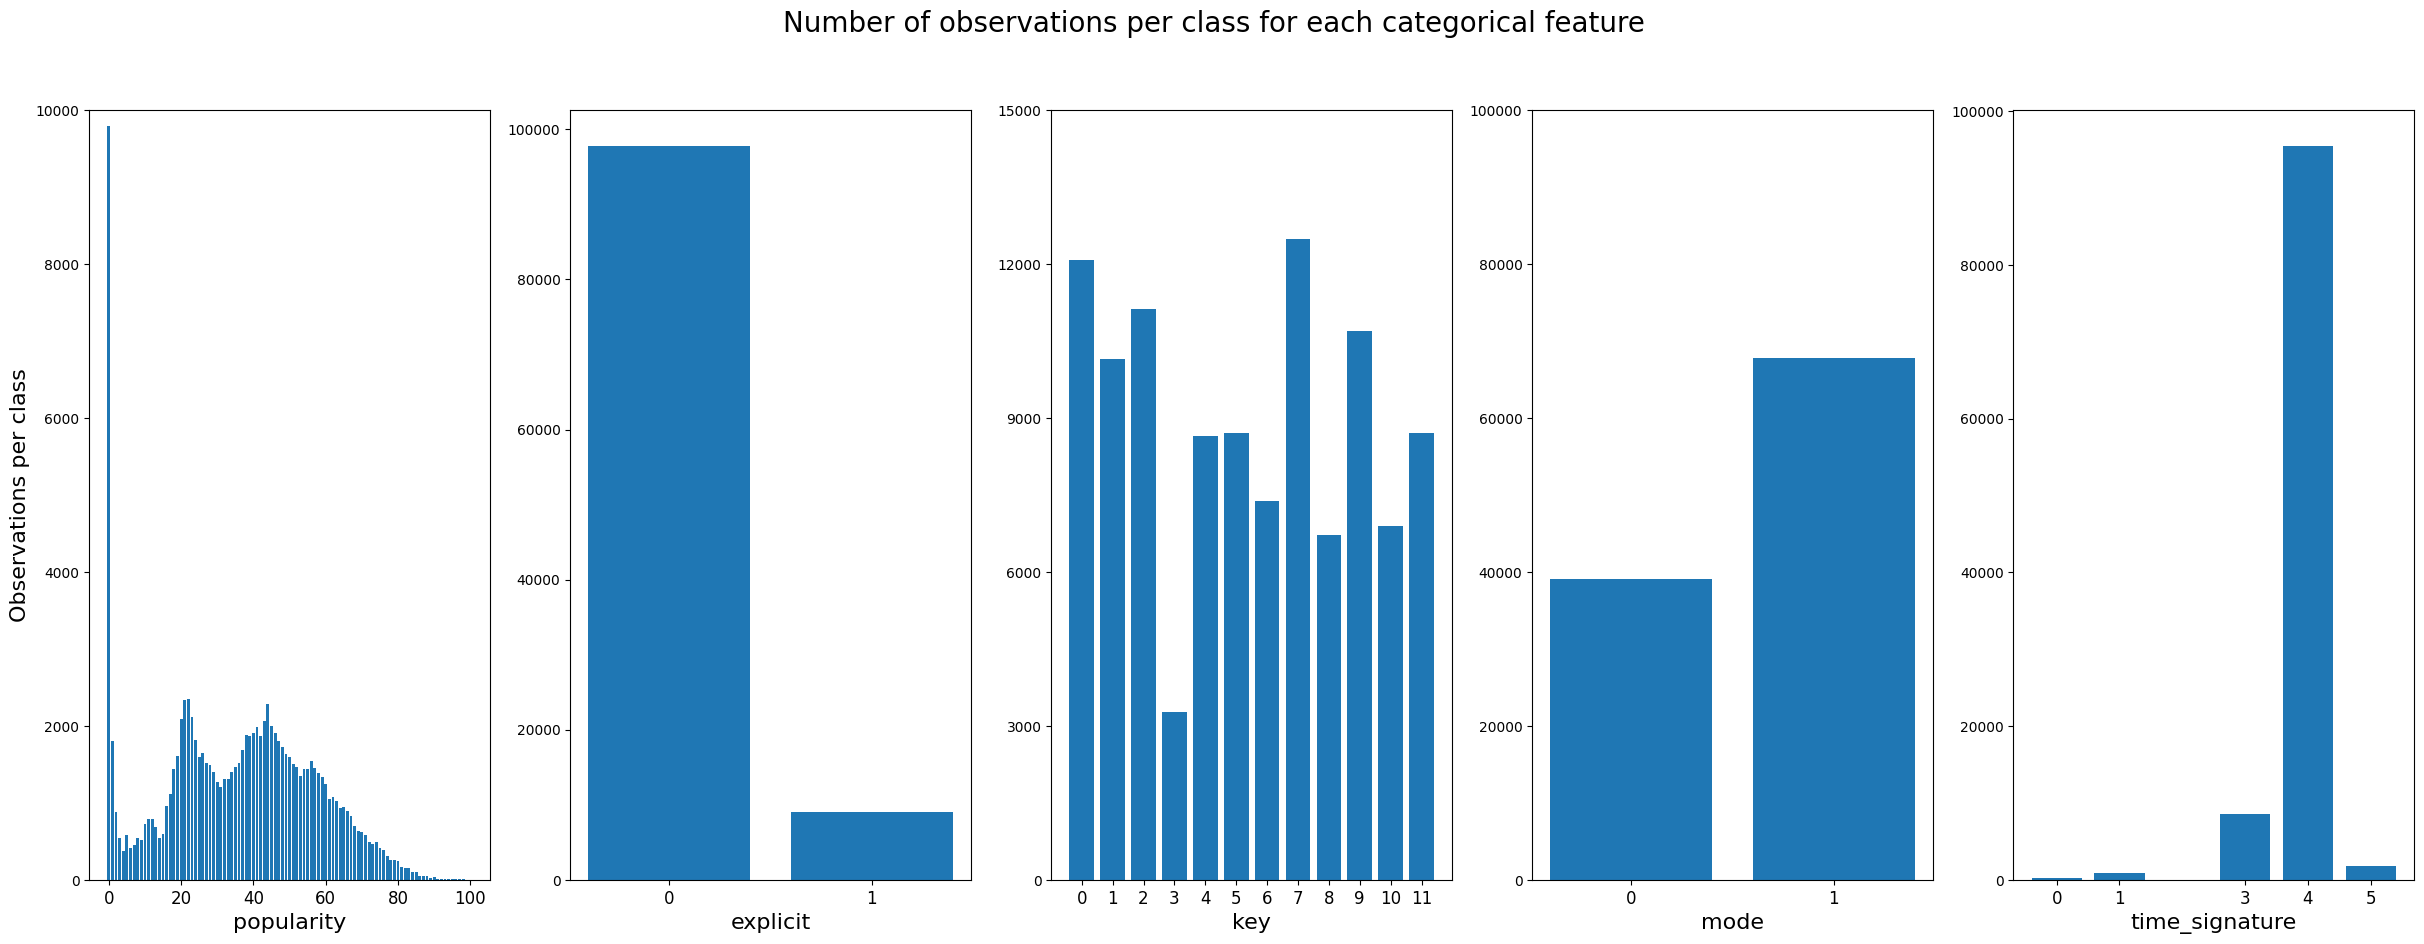

In [ ]:
# Visualize the class imbalance in the categorical features
fig, axs = plt.subplots(1,5)
features = ['popularity','explicit','key', 'mode', 'time_signature']
col = 0
for i in features:
  val_count = df_raw[i].value_counts().rename_axis(i).reset_index(name='count')
  axs[col].bar(val_count[i], val_count['count'])
  axs[col].set_xlabel(i, fontsize=16)
  axs[col].set_xticks(val_count[i])
  axs[col].set_yticks(np.arange(0,106811,20000))
  axs[col].tick_params(axis='x', which='major', labelsize=12)

  if i=='popularity':
    axs[col].set_xticks(np.arange(0,101,20))
    axs[col].set_yticks(np.arange(0, 10001, 2000))
    axs[col].set_ylim(0, 10000)

  if i == 'key':
    axs[col].set_yticks(np.arange(0, 15001, 3000))
    axs[col].set_ylim(0, 15000)

  col += 1


axs[0].set_ylabel('Observations per class', fontsize=16)
plt.suptitle("Number of observations per class for each categorical feature", fontsize=20)
fig.set_figwidth(30)
fig.set_figheight(10)
fig.show()

Summary of class imbalances:

`popularity`: On a scale from 0 to 100, majority of the tracks were labeled as 0.

`explicit`: The non-explicit (`0`) class significantly dominates explicit (`1`) class.

`key`: Relatively balanced.

`mode`: The major scale (`1`) class somewhat dominates the minor scale (`0`) class.

`time_signature`: Tracks with time signature 4/4 (`4`) significantly outnumbers rest, followed by the time signature 3/4 (`3`).

### Examine the reponse variable `track_genre`:

In [ ]:
df_raw.track_genre.nunique()

114

In [ ]:
df_raw.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

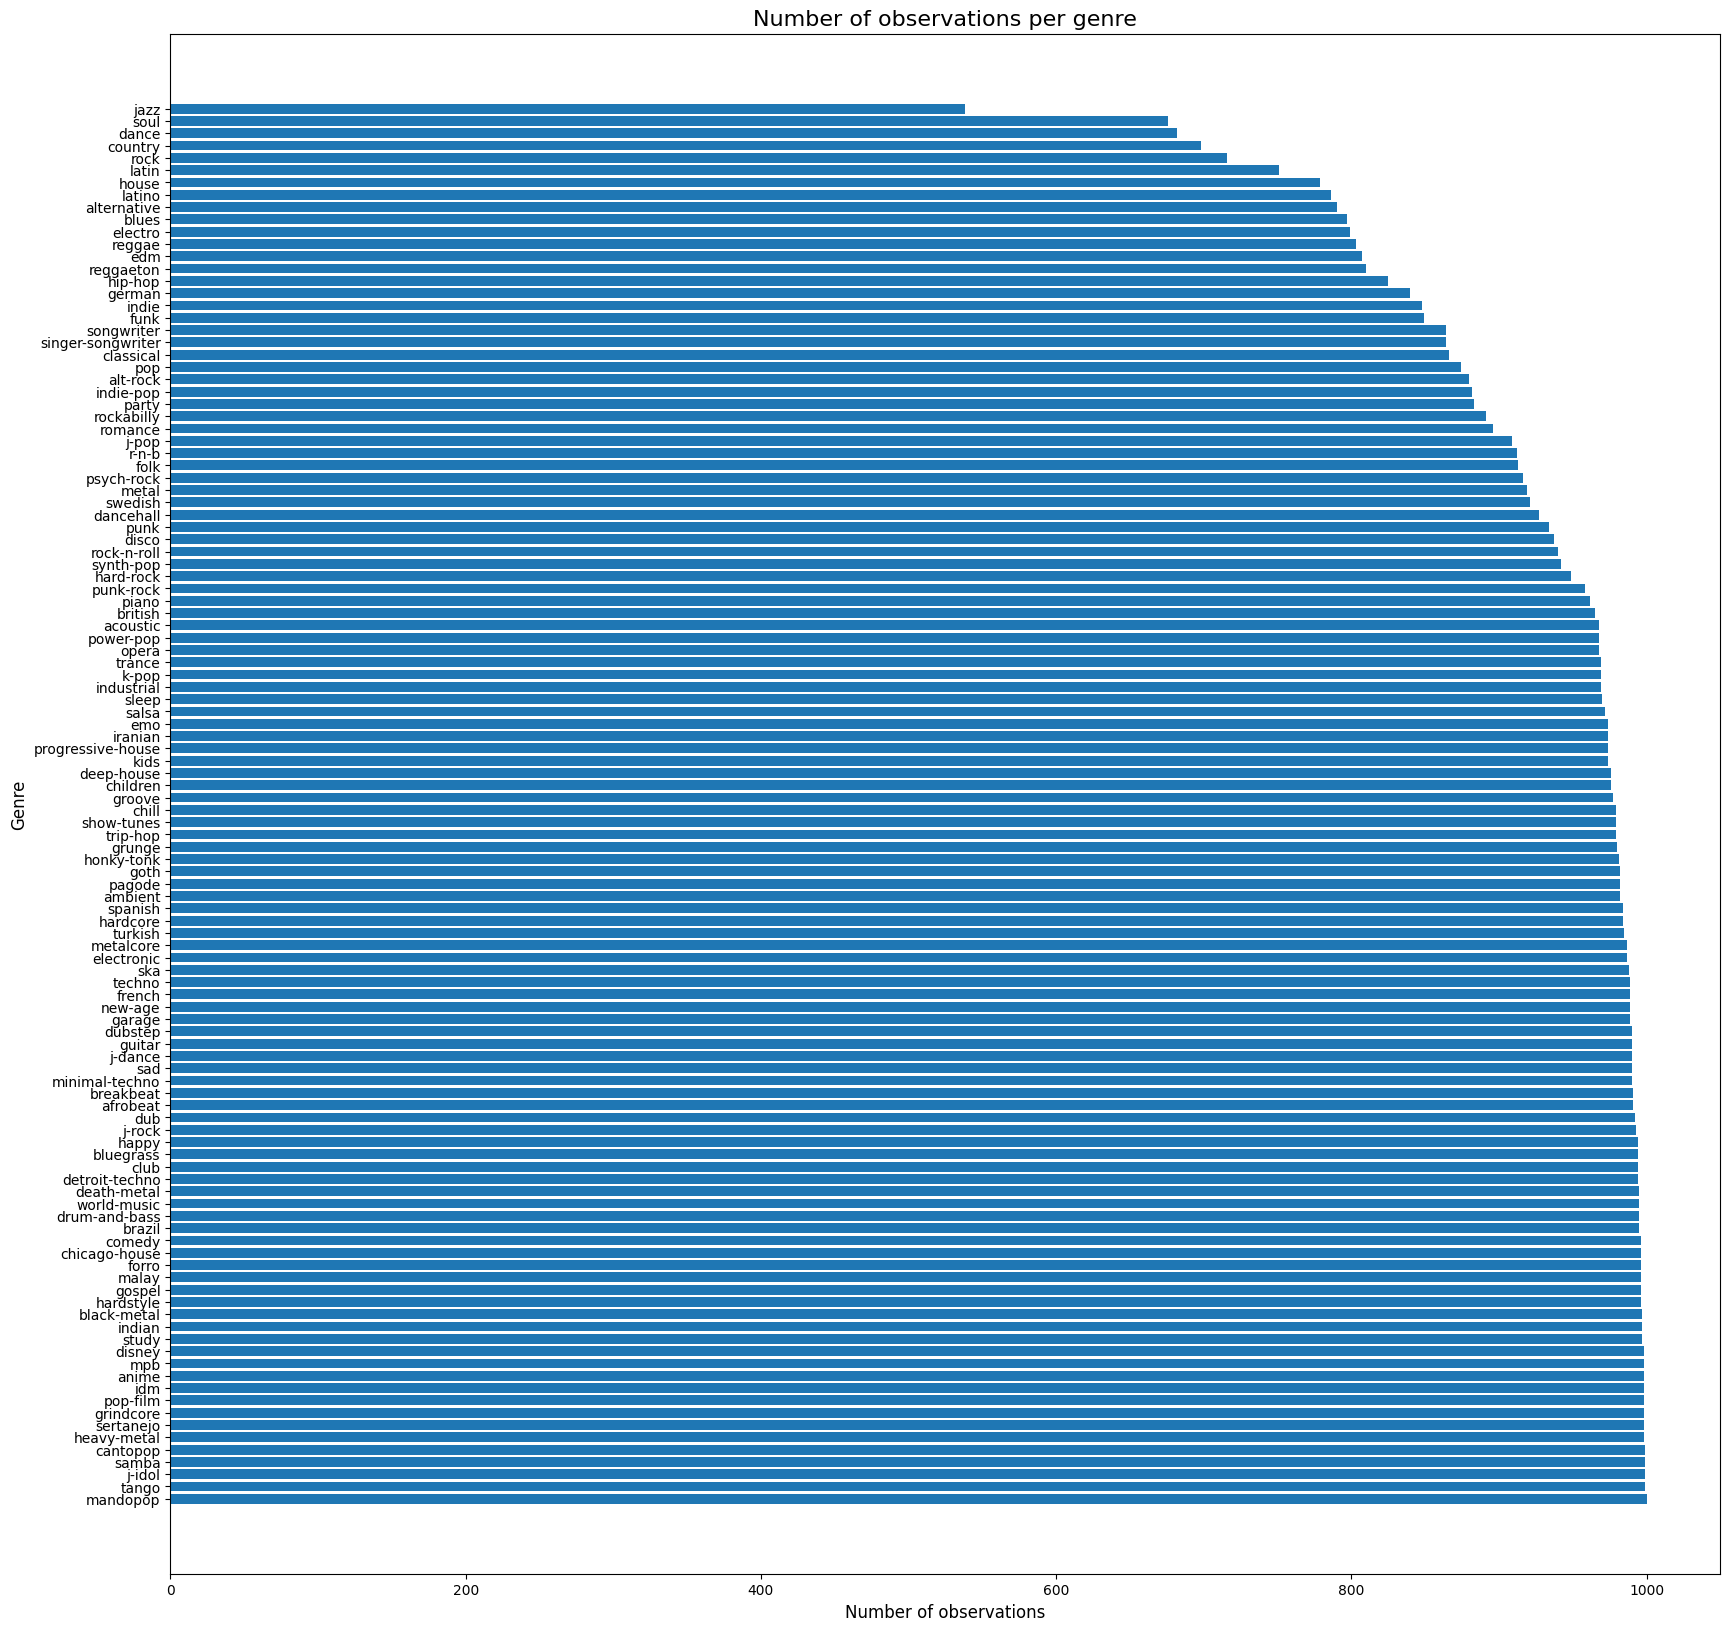

In [ ]:
# Visualize any class imbalance in the response variable 'track_genre
from matplotlib import container

fig, ax = plt.subplots()

val_count = df_raw['track_genre'].value_counts().rename_axis('track_genre').reset_index(name='count')
ax.barh(val_count['track_genre'], val_count['count'])
ax.set_ylabel('Genre', fontsize=12)
ax.set_xlabel('Number of observations', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_title("Number of observations per genre", fontsize=16)
fig.set_figwidth(20)
fig.set_figheight(20)
fig.show()

In [ ]:
pd.set_option('display.max_rows', None)
df_raw['track_genre'].value_counts()

track_genre
mandopop             1000
tango                 999
j-idol                999
samba                 999
cantopop              999
heavy-metal           998
sertanejo             998
grindcore             998
pop-film              998
idm                   998
anime                 998
mpb                   998
disney                998
study                 997
indian                997
black-metal           997
hardstyle             996
gospel                996
malay                 996
forro                 996
chicago-house         996
comedy                996
brazil                995
drum-and-bass         995
world-music           995
death-metal           995
detroit-techno        994
club                  994
bluegrass             994
happy                 994
j-rock                993
dub                   992
afrobeat              991
breakbeat             991
minimal-techno        990
sad                   990
j-dance               990
guitar                990
dubstep               990
garage                989
new-age               989
french                989
techno                989
ska                   988
electronic            987
metalcore             987
turkish               985
hardcore              984
spanish               984
ambient               982
pagode                982
goth                  982
honky-tonk            981
grunge                980
trip-hop              979
show-tunes            979
chill                 979
groove                977
children              976
deep-house            976
kids                  974
progressive-house     974
iranian               974
emo                   974
salsa                 972
sleep                 970
industrial            969
k-pop                 969
trance                969
opera                 968
power-pop             968
acoustic              968
british               965
piano                 962
punk-rock             958
hard-rock             949
synth-pop             942
rock-n-roll           940
disco                 937
punk                  934
dancehall             927
swedish               921
metal                 919
psych-rock            916
folk                  913
r-n-b                 912
j-pop                 909
romance               896
rockabilly            891
party                 883
indie-pop             882
alt-rock              880
pop                   874
classical             866
singer-songwriter     864
songwriter            864
funk                  849
indie                 848
german                840
hip-hop               825
reggaeton             810
edm                   807
reggae                803
electro               799
blues                 797
alternative           790
latino                786
house                 779
latin                 751
rock                  716
country               698
dance                 682
soul                  676
jazz                  538
Name: count, dtype: int64

The data is somewhat imbalanced in terms of the response variable `track_genre`. However, the ratio between the smallest class ("jazz") and largest class ("mandopop") is 538:1000, which is relatively acceptable rate.

In preparation for EDA,  we'll make a new copy of the data set with the columns `album_name`, `track_name`, and `artists` dropped and will keep only observations belonging to the top 20 genres by count in the data in order to preserve the amount of data we have to work with and allow for more robust and effective classification of track genre. With 114 classes and 15 features, most models are unable to accurately classify observations.

In [ ]:
# Isolate the numerical data (i.e. drop the album, track, and artist names) and the response variable 'track_genre'
df_raw.drop(columns=['album_name','track_name','artists'], inplace=True)
top20 = df_raw['track_genre'].value_counts(ascending=False)[:20].index
df = df_raw[df_raw['track_genre'].isin(top20)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19955 entries, 5000 to 108999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        19955 non-null  int64  
 1   duration_ms       19955 non-null  int64  
 2   explicit          19955 non-null  int64  
 3   danceability      19955 non-null  float64
 4   energy            19955 non-null  float64
 5   key               19955 non-null  int64  
 6   loudness          19955 non-null  float64
 7   mode              19955 non-null  int64  
 8   speechiness       19955 non-null  float64
 9   acousticness      19955 non-null  float64
 10  instrumentalness  19955 non-null  float64
 11  liveness          19955 non-null  float64
 12  valence           19955 non-null  float64
 13  tempo             19955 non-null  float64
 14  time_signature    19955 non-null  int64  
 15  track_genre       19955 non-null  object 
dtypes: float64(9), int64(6), object(1)
memory

In [ ]:
# Create a standardized version of the data for modeling purposes after EDA
ss = preprocessing.StandardScaler()
df_ss = df.copy()
num_cols = df.drop(columns='track_genre').columns
df_ss[num_cols] = ss.fit_transform(df.drop(columns='track_genre'))
df_ss.describe()

popularity   duration_ms      explicit  danceability        energy  \
count  1.995500e+04  19955.000000  1.995500e+04  1.995500e+04  1.995500e+04   
mean   2.050978e-16      0.000000 -3.988012e-17 -3.304353e-16  2.050978e-16   
std    1.000025e+00      1.000025  1.000025e+00  1.000025e+00  1.000025e+00   
min   -2.178315e+00     -2.097496 -1.812939e-01 -2.872858e+00 -2.521597e+00   
25%   -9.021446e-01     -0.583862 -1.812939e-01 -6.338779e-01 -7.797228e-01   
50%    1.826001e-01     -0.062605 -1.812939e-01  8.768604e-02  9.923667e-02   
75%    7.568767e-01      0.461311 -1.812939e-01  7.392248e-01  9.190733e-01   
max    3.436834e+00     27.786392  5.515904e+00  2.541613e+00  1.419647e+00   

                key      loudness          mode   speechiness  acousticness  \
count  1.995500e+04  1.995500e+04  1.995500e+04  1.995500e+04  1.995500e+04   
mean   8.759384e-17 -4.557728e-17  8.830599e-17 -5.412302e-17 -9.115457e-17   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -1.477168e+00 -7.289416e+00 -1.349109e+00 -7.503996e-01 -1.131785e+00   
25%   -9.129795e-01 -4.655263e-01 -1.349109e+00 -5.660042e-01 -1.043219e+00   
50%   -6.669615e-02  1.902211e-01  7.412297e-01 -3.830164e-01 -1.645077e-01   
75%    7.795872e-01  7.005375e-01  7.412297e-01  1.293495e-01  8.994976e-01   
max    1.625871e+00  2.155076e+00  7.412297e-01  1.215587e+01  1.878866e+00   

       instrumentalness      liveness       valence         tempo  \
count      1.995500e+04  19955.000000  1.995500e+04  1.995500e+04   
mean       5.127444e-17      0.000000  1.709148e-16  4.158927e-16   
std        1.000025e+00      1.000025  1.000025e+00  1.000025e+00   
min       -5.420494e-01     -1.063757 -1.786541e+00 -3.078958e+00   
25%       -5.420494e-01     -0.657857 -8.300205e-01 -7.976322e-01   
50%       -5.419570e-01     -0.442294 -8.871751e-02  7.469095e-03   
75%       -2.221223e-01      0.337401  7.801215e-01  7.138510e-01   
max        2.473113e+00      3.433249  2.139177e+00  3.191446e+00   

       time_signature  
count    1.995500e+04  
mean    -1.370879e-16  
std      1.000025e+00  
min     -9.178637e+00  
25%      2.417046e-01  
50%      2.417046e-01  
75%      2.417046e-01  
max      2.596790e+00

In [ ]:
# Create a scaled version of the data so that all values are between -1 and 1
mm = preprocessing.MinMaxScaler()
df_mm = df.copy()
num_cols = df.drop(columns='track_genre').columns
df_mm[num_cols] = mm.fit_transform(df.drop(columns='track_genre'))
df_mm.describe()

popularity   duration_ms      explicit  danceability        energy  \
count  19955.000000  19955.000000  19955.000000  19955.000000  19955.000000   
mean       0.387935      0.070188      0.031822      0.530589      0.639797   
std        0.178094      0.033464      0.175529      0.184695      0.253733   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.227273      0.050650      0.000000      0.413518      0.441961   
50%        0.420455      0.068093      0.000000      0.546784      0.664976   
75%        0.522727      0.085625      0.000000      0.667117      0.872991   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  19955.000000  19955.000000  19955.000000  19955.000000  19955.000000   
mean       0.476039      0.771817      0.645402      0.058142      0.375927   
std        0.322273      0.105884      0.478403      0.077484      0.332162   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.181818      0.722526      0.000000      0.014287      0.029418   
50%        0.454545      0.791958      1.000000      0.028465      0.321285   
75%        0.727273      0.845991      1.000000      0.068164      0.674699   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       instrumentalness      liveness       valence         tempo  \
count      19955.000000  19955.000000  19955.000000  19955.000000   
mean           0.179775      0.236548      0.455086      0.491030   
std            0.331665      0.222376      0.254737      0.159483   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.090260      0.243655      0.363824   
50%            0.000031      0.138195      0.432487      0.492221   
75%            0.106106      0.311576      0.653807      0.604875   
max            1.000000      1.000000      1.000000      1.000000   

       time_signature  
count    19955.000000  
mean         0.779474  
std          0.084925  
min          0.000000  
25%          0.800000  
50%          0.800000  
75%          0.800000  
max          1.000000

## split data

In [ ]:
# split data int 80% for training, 20% for testing (or cross validation)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='track_genre'), df['track_genre'], test_size=0.20, random_state=1, stratify=df['track_genre'])

## imputation

In [ ]:
from sklearn.utils import resample

# Function to balance a predictor variable
def balance_predictor_variable(X,y, column):
    # merge X,y into one dataset
    y = pd.DataFrame(y,columns=['track_genre'])
    df = pd.concat([X,y],axis=1)

    # Find the maximum count across all classes in the column
    max_count = df[column].value_counts().max()

    # Upsample or downsample each class to match max_count
    balanced_df = pd.concat([
        resample(df[df[column] == value],
                 replace=True, # Use replacement to upsample if needed
                 n_samples=max_count,
                 random_state=42)
        for value in df[column].unique()
    ])

    balanced_X = balanced_df.drop(columns='track_genre')
    balanced_y = balanced_df['track_genre']
    return balanced_X, balanced_y

In [ ]:
#X_train, y_train = balance_predictor_variable(X_train, y_train, 'explicit')
#X_train, y_train = balance_predictor_variable(X_train, y_train, 'popularity')
X_train, y_train = balance_predictor_variable(X_train, y_train, 'time_signature')
X_train, y_train = balance_predictor_variable(X_train, y_train, 'key')
X_train, y_train = balance_predictor_variable(X_train, y_train, 'mode')

In [ ]:
X_train.shape

(322594, 15)

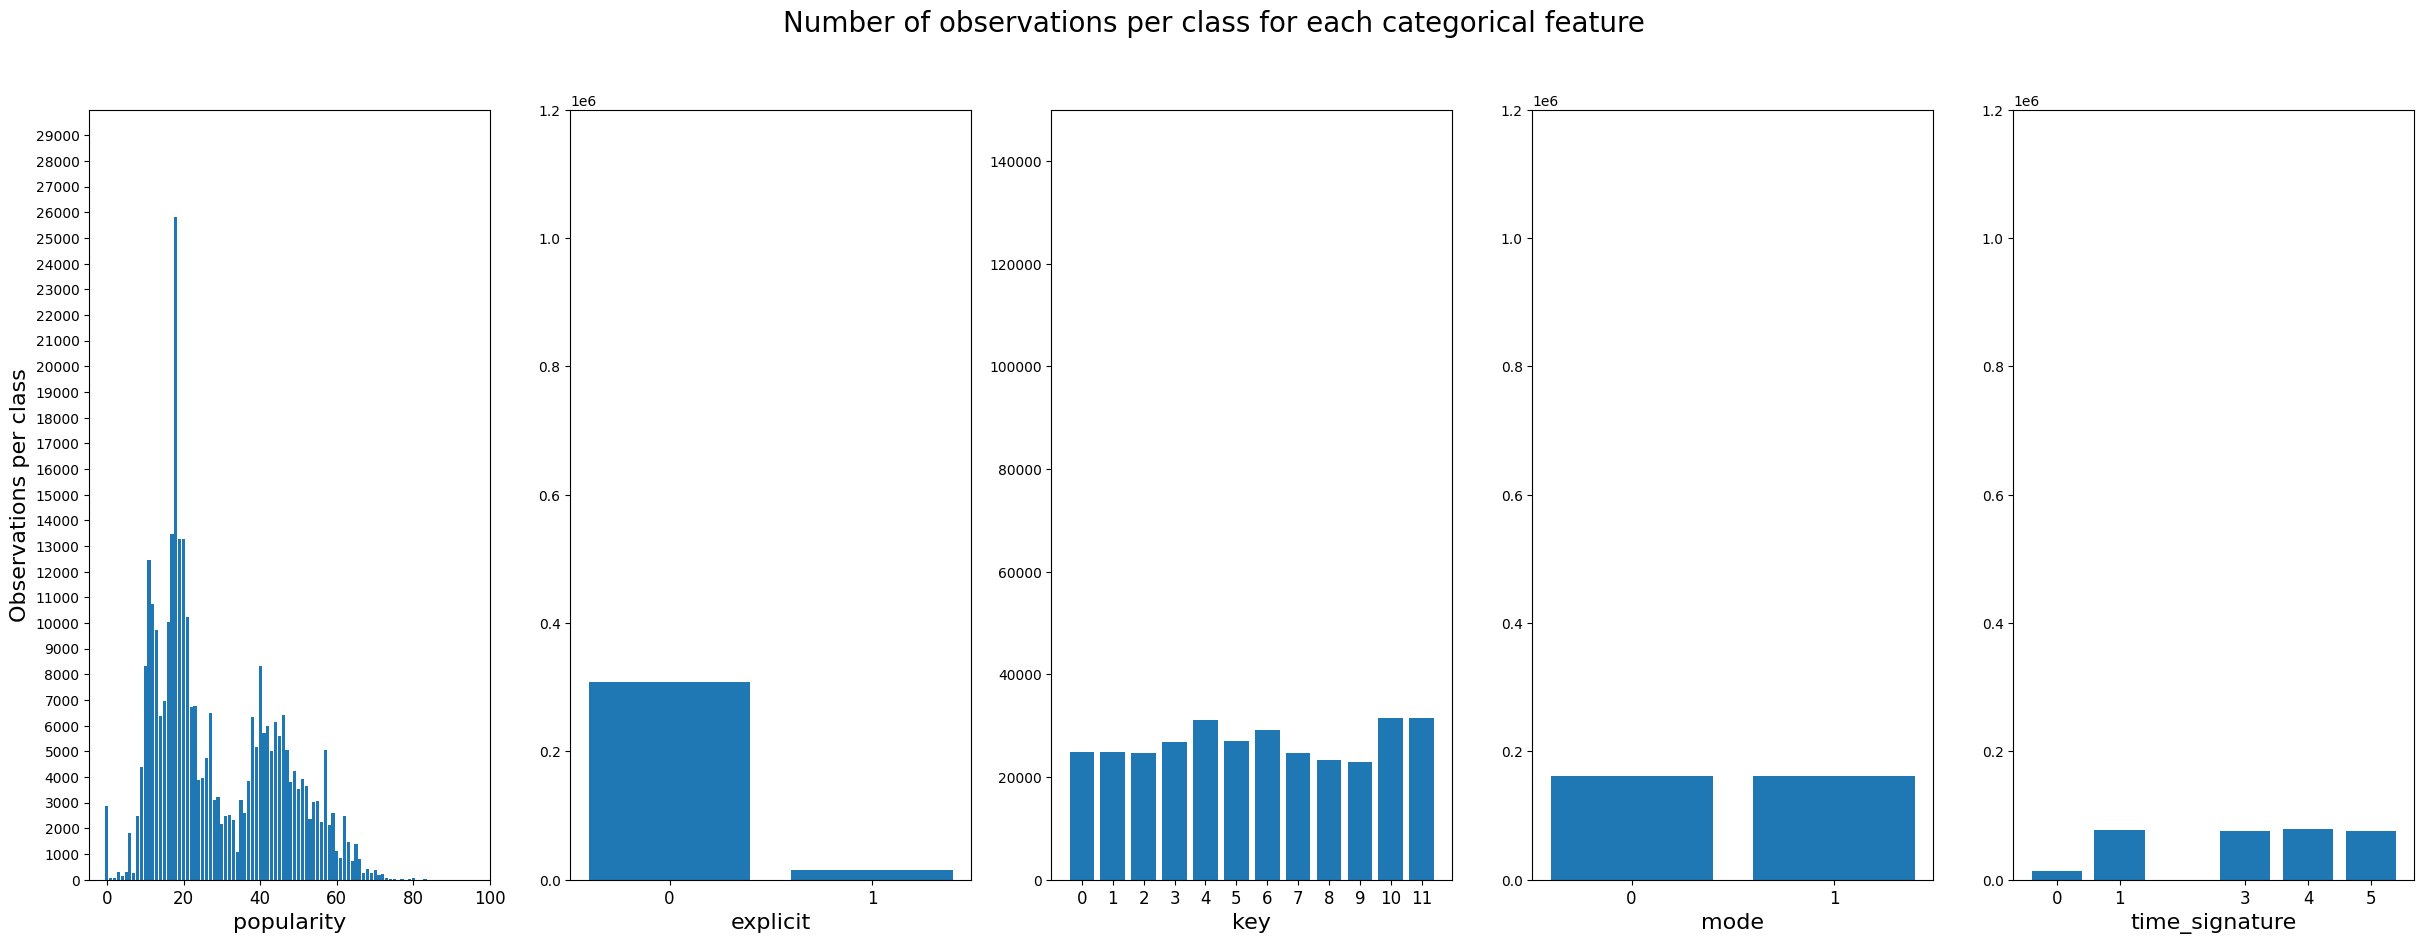

In [ ]:
# Visualize the class imbalance in the categorical features
fig, axs = plt.subplots(1,5)
features = ['popularity','explicit','key', 'mode', 'time_signature']
col = 0
for i in features:
  val_count = X_train[i].value_counts().rename_axis(i).reset_index(name='count')
  axs[col].bar(val_count[i], val_count['count'])
  axs[col].set_xlabel(i, fontsize=16)
  axs[col].set_xticks(val_count[i])
  axs[col].set_yticks(np.arange(0,1203760,200000))
  axs[col].tick_params(axis='x', which='major', labelsize=12)

  if i=='popularity':
    axs[col].set_xticks(np.arange(0,101,20))
    axs[col].set_yticks(np.arange(0,30000,1000))
    axs[col].set_ylim(0, 30000)

  if i == 'key':
    axs[col].set_yticks(np.arange(0, 150000, 20000))
    axs[col].set_ylim(0, 150000)

  col += 1


axs[0].set_ylabel('Observations per class', fontsize=16)
plt.suptitle("Number of observations per class for each categorical feature", fontsize=20)
fig.set_figwidth(30)
fig.set_figheight(10)
fig.show()

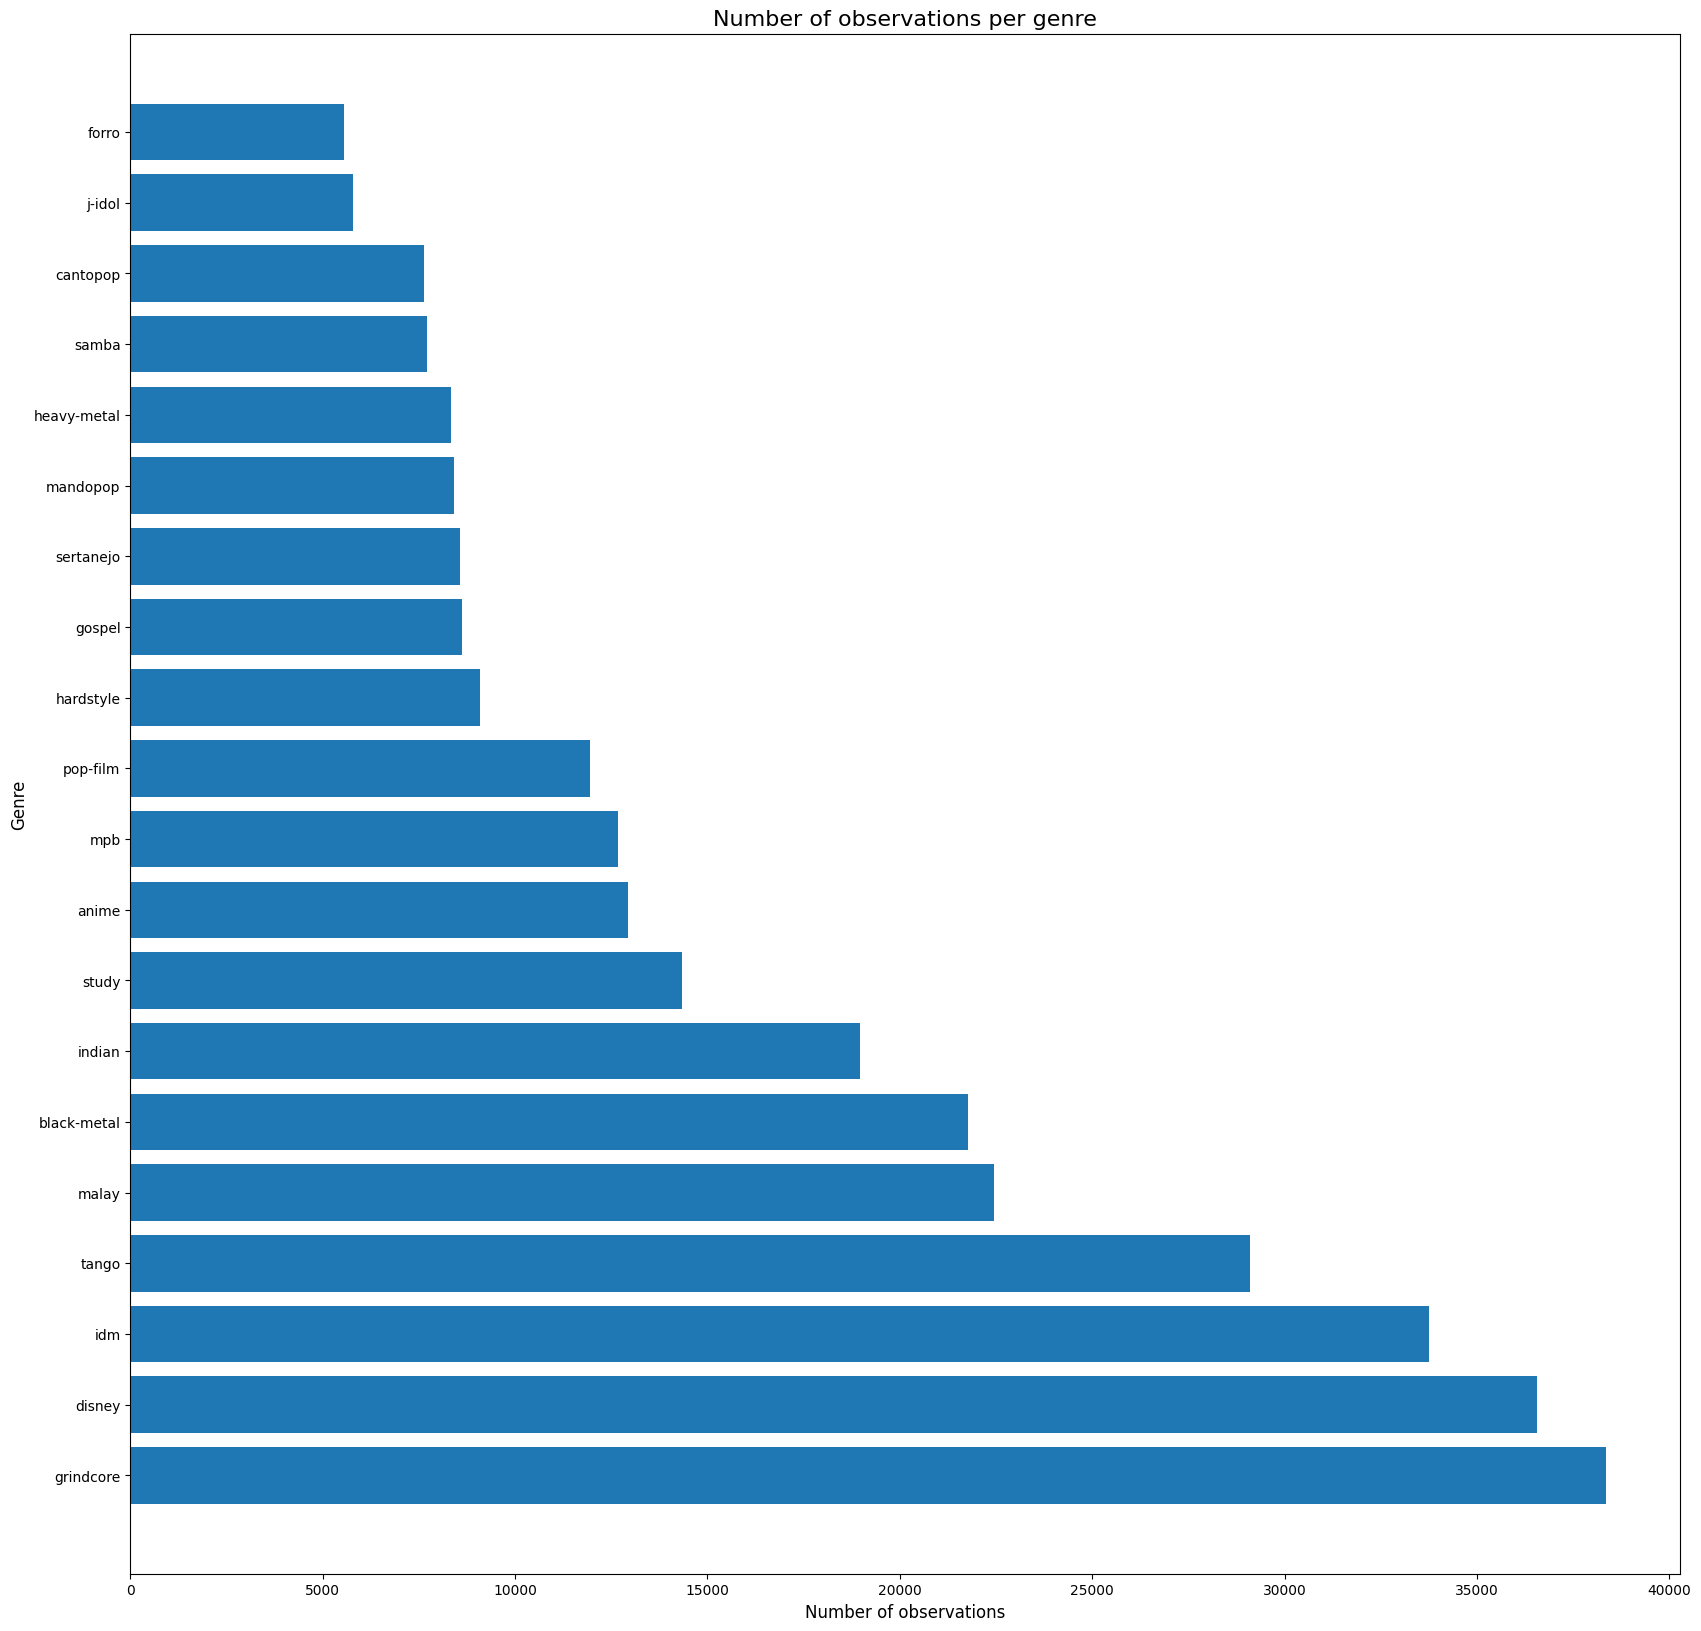

In [ ]:
# Visualize any class imbalance in the response variable 'track_genre
from matplotlib import container

fig, ax = plt.subplots()

val_count = y_train.value_counts().rename_axis('track_genre').reset_index(name='count')
ax.barh(val_count['track_genre'], val_count['count'])
ax.set_ylabel('Genre', fontsize=12)
ax.set_xlabel('Number of observations', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_title("Number of observations per genre", fontsize=16)
fig.set_figwidth(20)
fig.set_figheight(20)
fig.show()

In [ ]:
# z-score standardized set
X_train_ss = X_train.copy()
X_train_ss[X_train.columns] = ss.fit_transform(X_train_ss)
X_test_ss = X_test.copy()
X_test_ss[X_test.columns] = ss.fit_transform(X_test_ss)

# min-ax standardized set
X_train_mm = X_train.copy()
X_train_mm[X_train.columns] = mm.fit_transform(X_train_mm)
X_test_mm = X_test.copy()
X_test_mm[X_test.columns] = mm.fit_transform(X_test_mm)

#II. Exploratory Data Analysis

In [ ]:
df.sample(10)

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
49566          21       236032         0         0.470   0.966    4    -2.558   
70890          48       256692         0         0.406   0.230    4    -9.007   
6739           19        86373         1         0.146   0.993    9    -3.506   
26536          21       165533         0         0.510   0.567    4    -7.394   
54331          12       185693         0         0.464   0.340    5   -14.873   
69833          19       207264         0         0.743   0.520    5   -10.793   
49094          33       190601         1         0.561   0.921    0    -3.687   
80475          62       246883         0         0.543   0.440    7    -8.595   
12933          42       234023         0         0.614   0.359    9    -8.916   
80516          60       319480         0         0.677   0.533    0    -9.741   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
49566     0       0.0670      0.012800          0.004100     0.378   0.3100   
70890     1       0.0297      0.880000          0.000000     0.107   0.3950   
6739      1       0.0910      0.000001          0.910000     0.266   0.5020   
26536     0       0.0895      0.313000          0.000000     0.103   0.3410   
54331     1       0.0343      0.216000          0.909000     0.111   0.0382   
69833     0       0.0524      0.153000          0.000005     0.180   0.7560   
49094     0       0.0419      0.016700          0.754000     0.125   0.1960   
80475     1       0.0597      0.795000          0.000000     0.224   0.7260   
12933     1       0.0325      0.863000          0.000000     0.115   0.3810   
80516     1       0.0343      0.157000          0.000059     0.121   0.3980   

         tempo  time_signature  track_genre  
49566  155.007               4    hardstyle  
70890  159.914               4     mandopop  
6739   190.151               4  black-metal  
26536   66.601               4       disney  
54331  146.342               4          idm  
69833  101.972               4        malay  
49094  161.993               4    hardstyle  
80475  125.530               5     pop-film  
12933  136.037               4     cantopop  
80516  119.954               4     pop-film

In [ ]:
# Examine the descriptive statistics of the numerical data
df.describe()

popularity   duration_ms      explicit  danceability        energy  \
count  19955.000000  1.995500e+04  19955.000000  19955.000000  19955.000000   
mean      34.138311  2.280829e+05      0.031822      0.530600      0.639823   
std       15.672283  9.440203e+04      0.175529      0.164231      0.253715   
min        0.000000  3.008000e+04      0.000000      0.058800      0.000071   
25%       20.000000  1.729665e+05      0.000000      0.426500      0.442000   
50%       37.000000  2.221730e+05      0.000000      0.545000      0.665000   
75%       46.000000  2.716305e+05      0.000000      0.652000      0.873000   
max       88.000000  2.851109e+06      1.000000      0.948000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  19955.000000  19955.000000  19955.000000  19955.000000  19955.000000   
mean       5.236432     -8.060454      0.645402      0.075411      0.374423   
std        3.545001      4.397383      0.478403      0.071045      0.330834   
min        0.000000    -40.114000      0.000000      0.022100      0.000000   
25%        2.000000    -10.107500      0.000000      0.035200      0.029300   
50%        5.000000     -7.224000      1.000000      0.048200      0.320000   
75%        8.000000     -4.980000      1.000000      0.084600      0.672000   
max       11.000000      1.416000      1.000000      0.939000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      19955.000000  19955.000000  19955.000000  19955.000000   
mean           0.179595      0.246435      0.448260    123.717437   
std            0.331334      0.218039      0.250916     30.334212   
min            0.000000      0.014500      0.000000     30.322000   
25%            0.000000      0.103000      0.240000     99.522500   
50%            0.000031      0.150000      0.426000    123.944000   
75%            0.106000      0.320000      0.644000    145.371000   
max            0.999000      0.995000      0.985000    220.525000   

       time_signature  
count    19955.000000  
mean         3.897369  
std          0.424624  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

Most of the features ranges between [0,1] while the rest vary drastically: some ranges betweem [0,100] (e.g. `popularity`), some [0,11] (e.g. `key`), or even to negative values (e.g. `loudness`). Thus, it will be important to standardize and/or mean center these features accordingly for the remainder of the project.


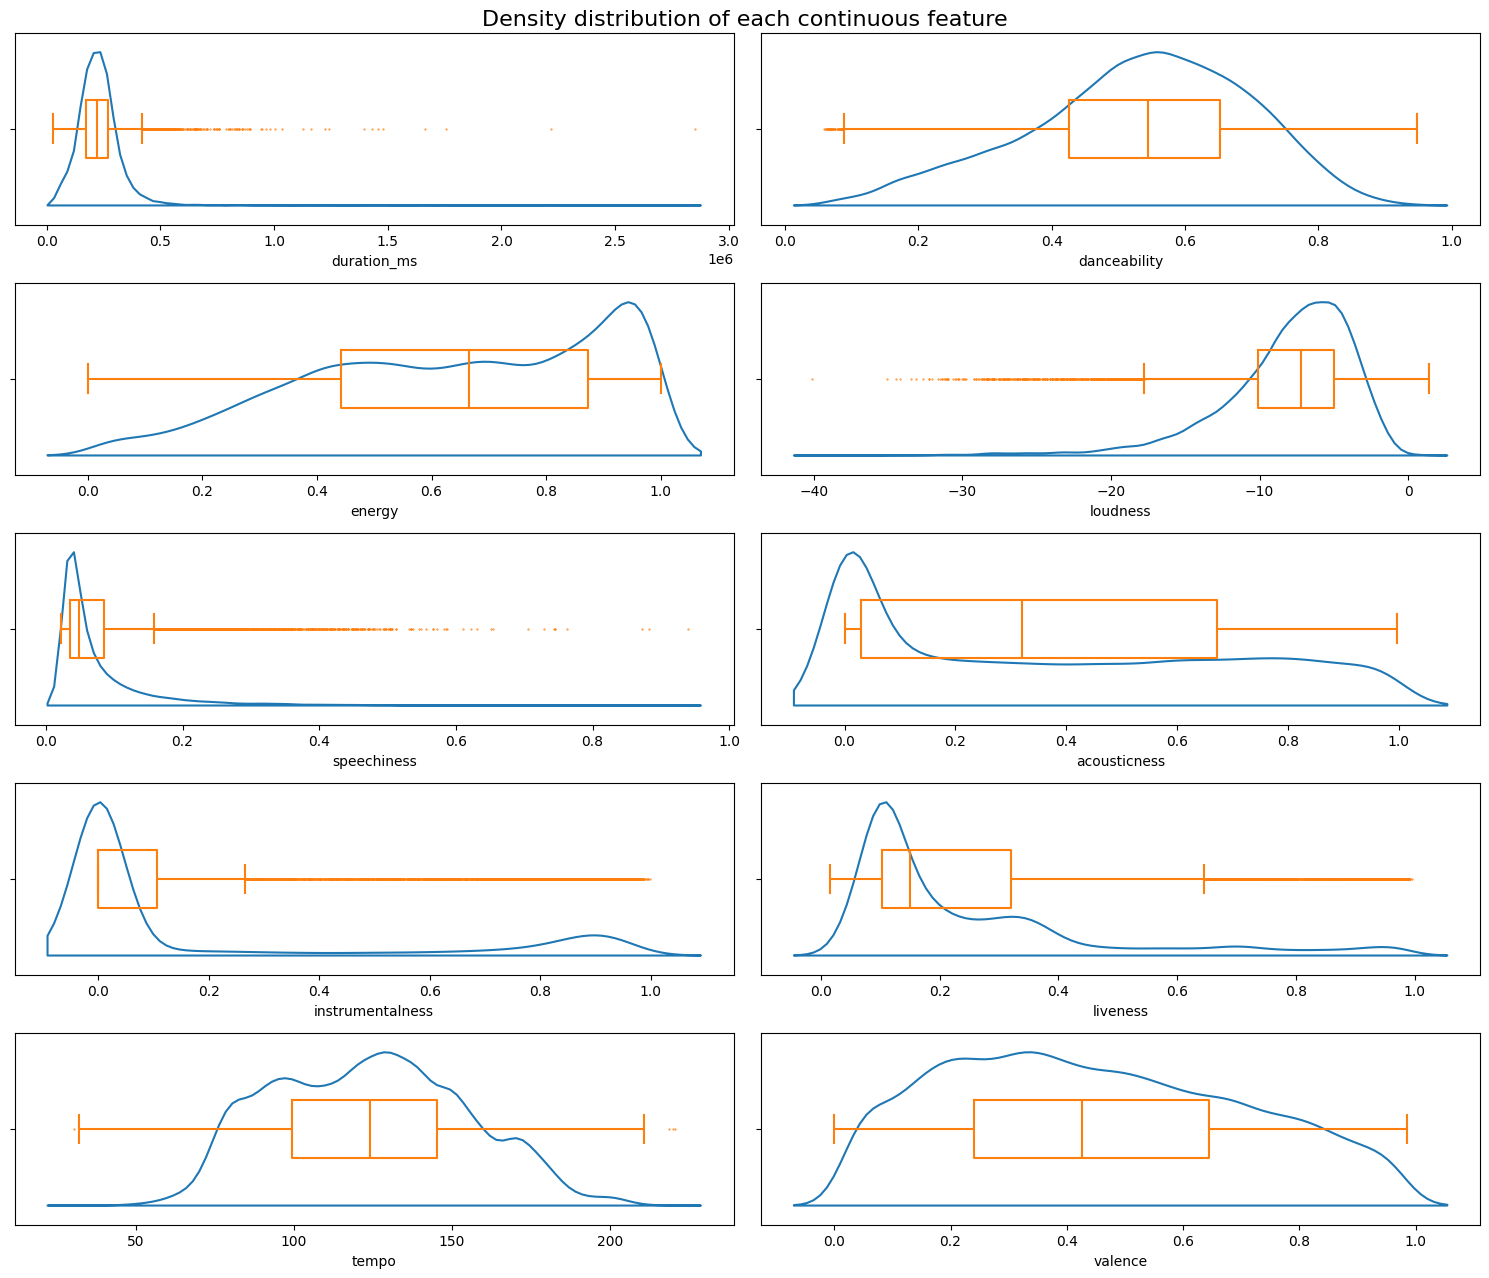

In [ ]:
# Plot the density distribution for each continuous variable
cts_cols = ['duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','valence']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
col = 0
row = 0

for i in cts_cols:
  sns.violinplot(data=df, x=i, ax=axes[row][col], inner=None, fill=False, split=True) #inner_kws=dict(box_width=15, whis_width=2)
  sns.boxplot(data=df, x=i, fill=False, width=0.3, fliersize=0.5, boxprops={'zorder': 2}, ax=axes[row][col])
  axes[row][col].set_xlabel(i, fontsize=10)
  col+=1
  if col==2:
    col=0
    row+=1

plt.suptitle('Density distribution of each continuous feature', fontsize=16)
plt.tight_layout()

Like some of the categorical predictor variables, many of the continuous predictor variables are heavily skewed with a handful of outliers. This should be addressed depending on the assumptions made by different modeling techiques (e.g. distance-based clustering methods may be sensitive to outliers, linear regression assumes normality and homoscedasticity).

Text(0.5, 0.98, 'Mean values per genre')

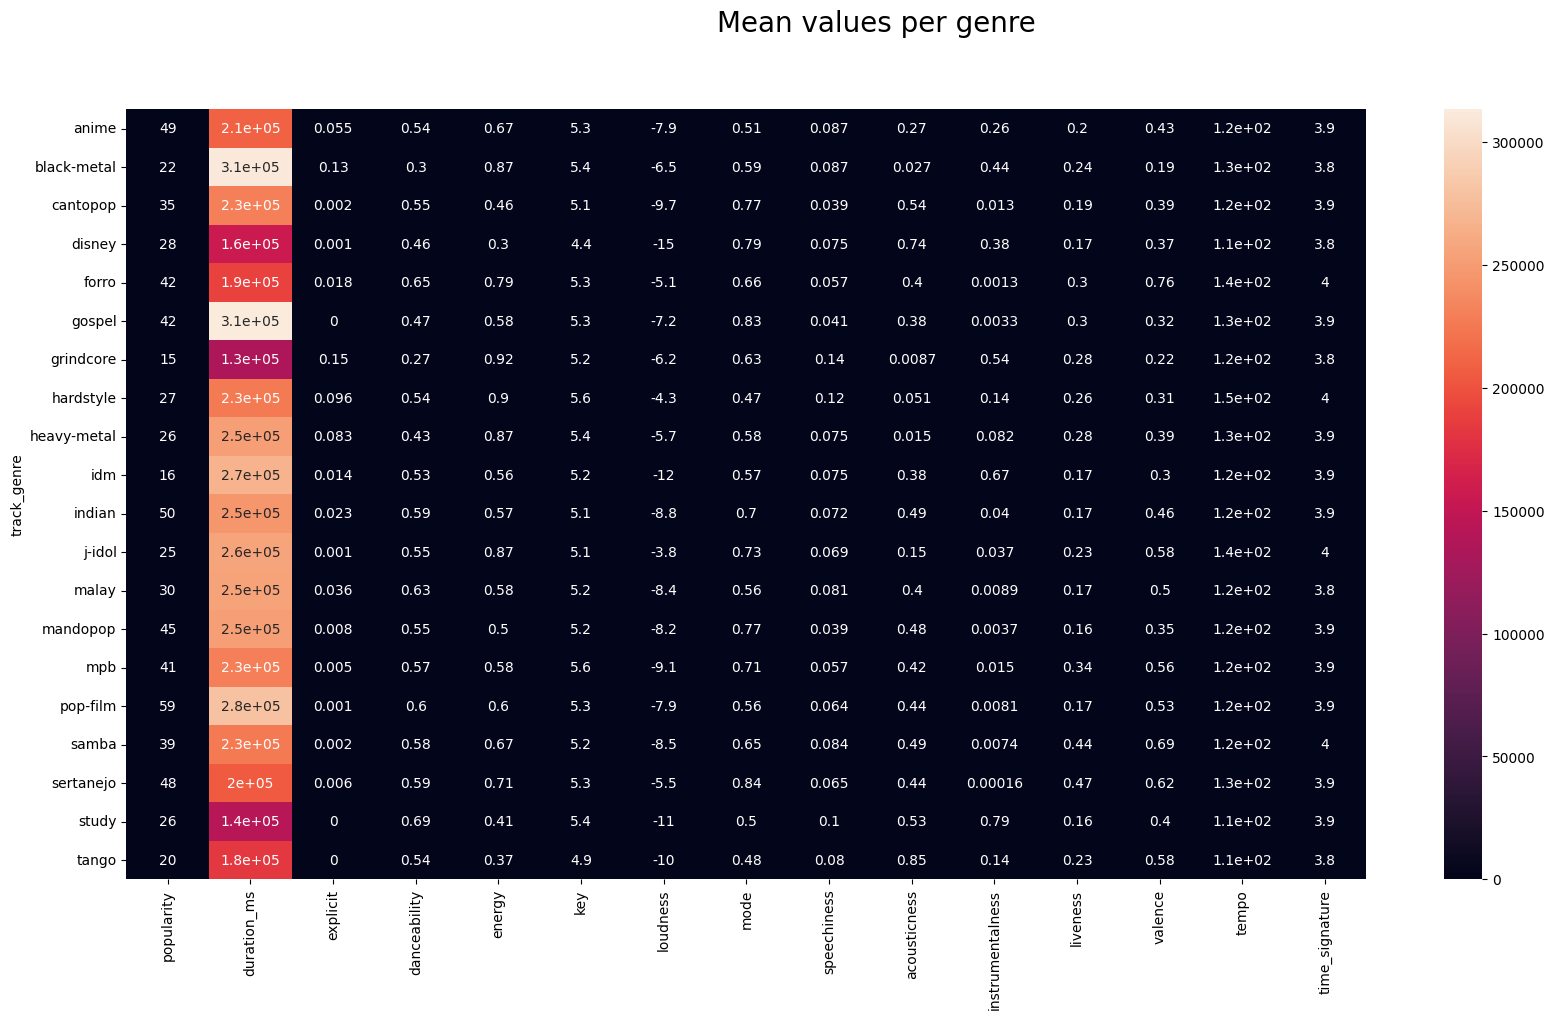

In [ ]:
# Examine the predictor variable means per genre
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.groupby('track_genre').mean(),annot=True)
plt.suptitle('Mean values per genre', fontsize=20)

As illustrated by the mean values per feature per genre, some of the class imbalance in the predictor variables are associated with specific classes in the response variable `track_genre`. For instance, `explicit`-ness is expecially present in genres like grindcore, black-metal, an hardstyle.

Text(0.5, 0.98, 'Correlation Matrix between Predictor Variables')

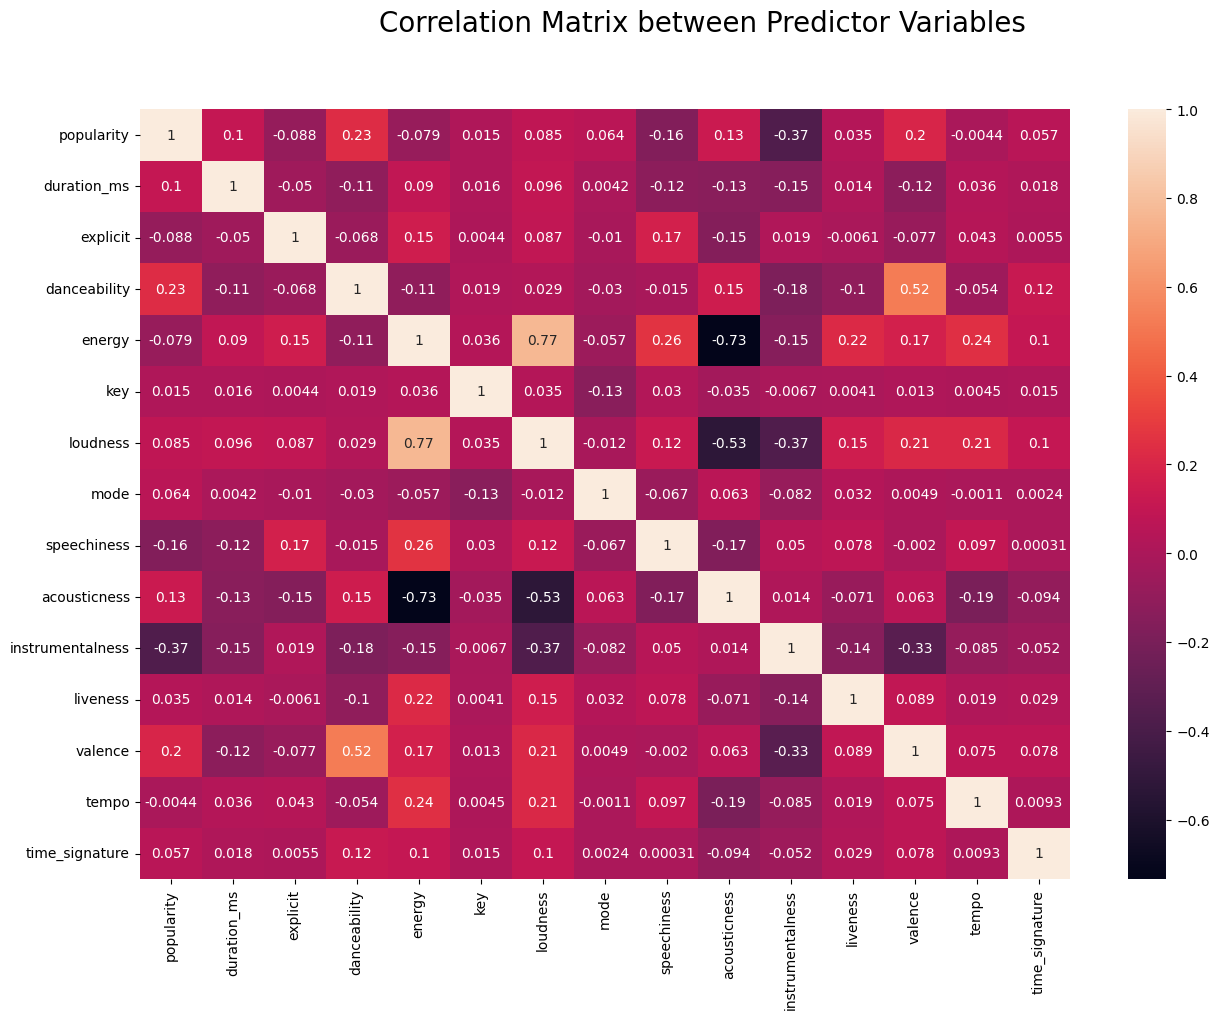

In [ ]:
# Plot the correlation matrix between predictor variables
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.drop(columns=['track_genre']).corr(),annot=True)
plt.suptitle("Correlation Matrix between Predictor Variables", fontsize=20)

It is important to note the following highly-correlated features since modeling techinques (e.g. logistic regression) can make assumptions about the absence of multicollinearity.

* valence and danceability: 0.52
* energy and loudness: -0.73
* energy and acousticness: -0.73
* loudness and acousticness: -0.53

The scatterplots below illutrates how their relationships are non-linear.

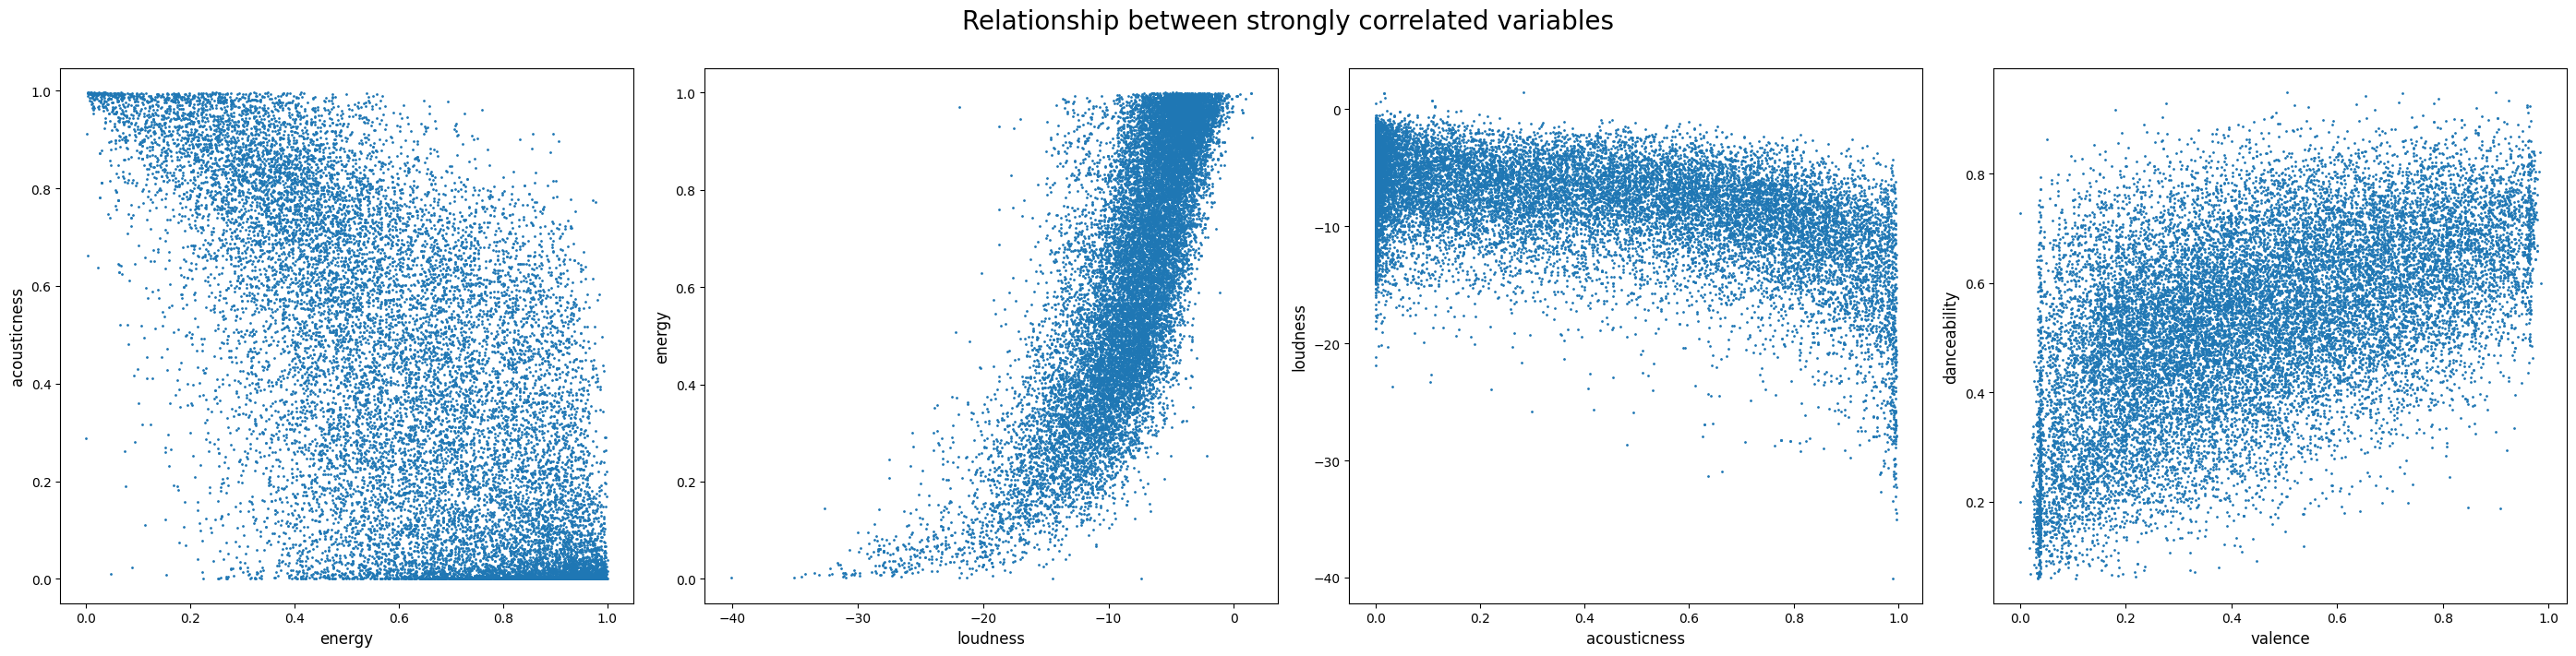

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(28,7))
axs[0].scatter(df['energy'], df['acousticness'], s=1)
axs[0].set_xlabel('energy', fontsize=12)
axs[0].set_ylabel('acousticness', fontsize=12)
axs[1].scatter(df['loudness'], df['energy'], s=1)
axs[1].set_xlabel('loudness', fontsize=12)
axs[1].set_ylabel('energy', fontsize=12)
axs[2].scatter(df['acousticness'], df['loudness'], s=1)
axs[2].set_xlabel('acousticness', fontsize=12)
axs[2].set_ylabel('loudness', fontsize=12)
axs[3].scatter(df['valence'], df['danceability'], s=1)
axs[3].set_xlabel('valence', fontsize=12)
axs[3].set_ylabel('danceability', fontsize=12)

plt.suptitle("Relationship between strongly correlated variables", y=1.01, fontsize=20)
plt.tight_layout()
plt.show()

We can further explore the relationship between each numerical feature's distribution and each categorical feature via the density plots below.

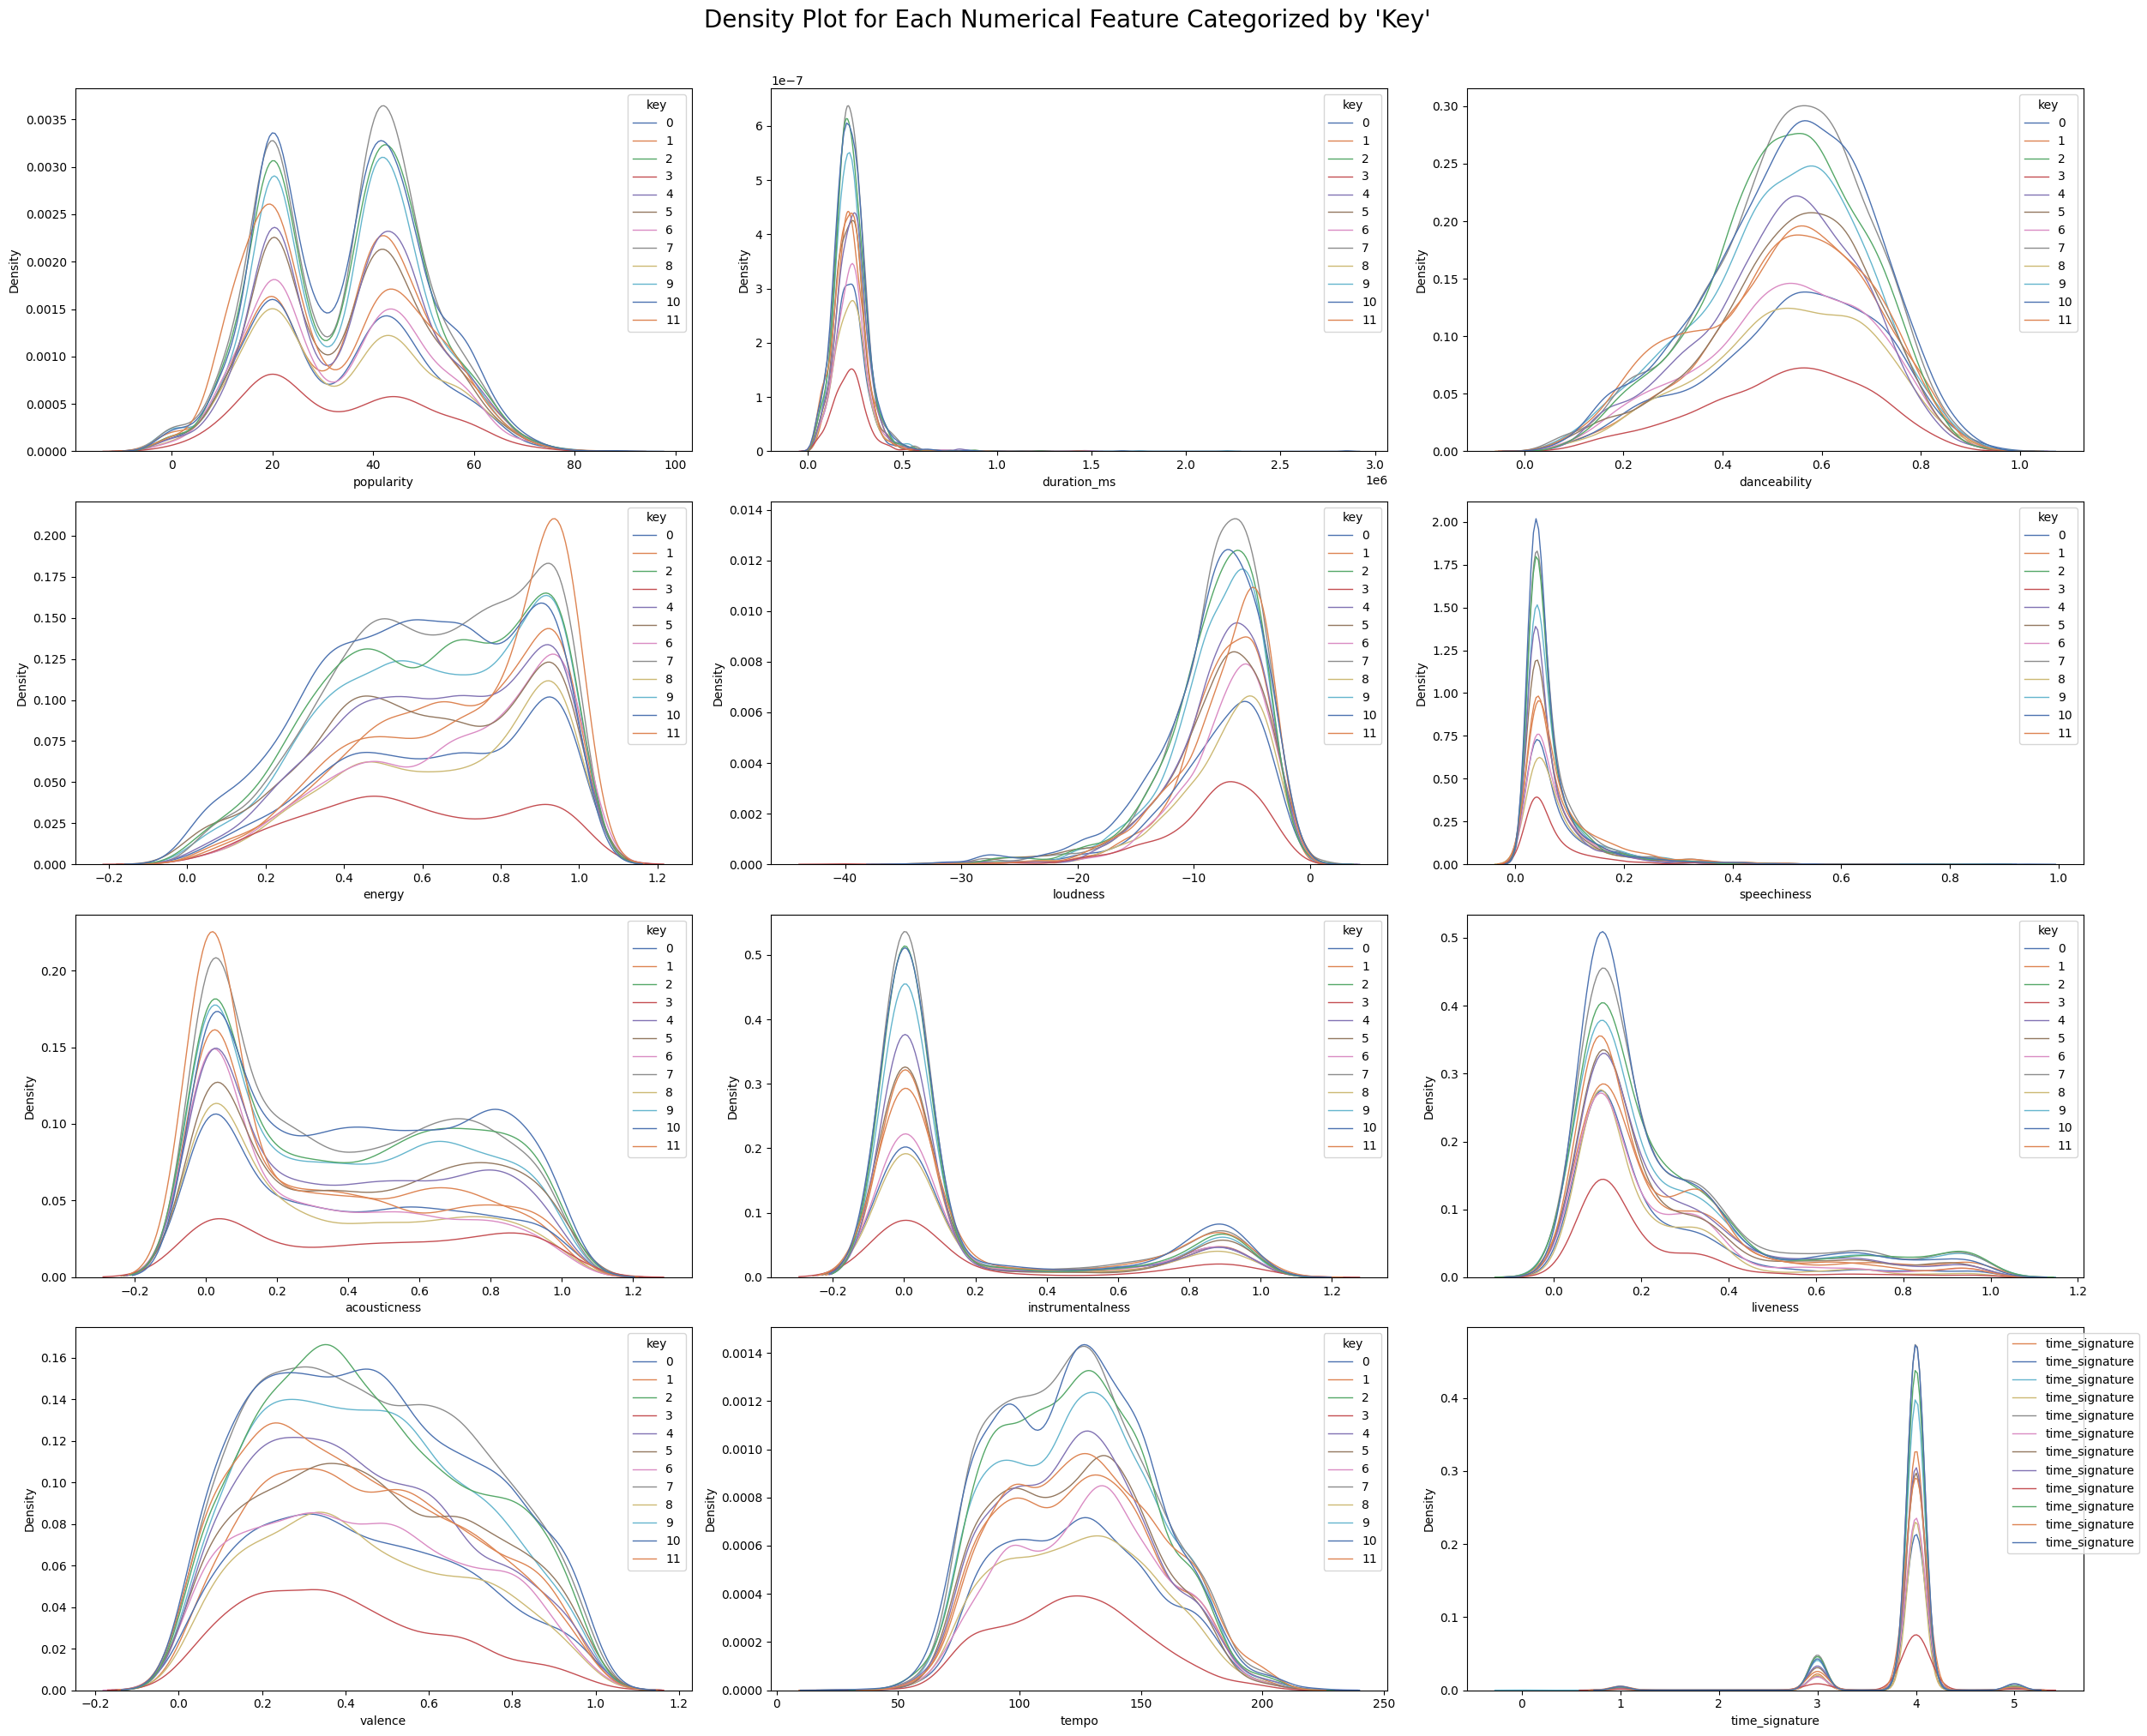

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(4,3, figsize=(25,20))
i=0
j=0
# Loop through the columns and create a KDE plot for each
for col in df.drop(columns=['track_genre','mode','explicit','key']).columns:
    sns.kdeplot(df[[col,'key']], x=col, ax=ax[i][j], label=col, lw=1, palette='deep', hue='key')
    j+=1
    if j==3:
      j=0
      i+=1

# Add a legend and title
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
plt.suptitle("Density Plot for Each Numerical Feature Categorized by 'Key'", y=1.01, fontsize=20)
plt.tight_layout()
plt.show()

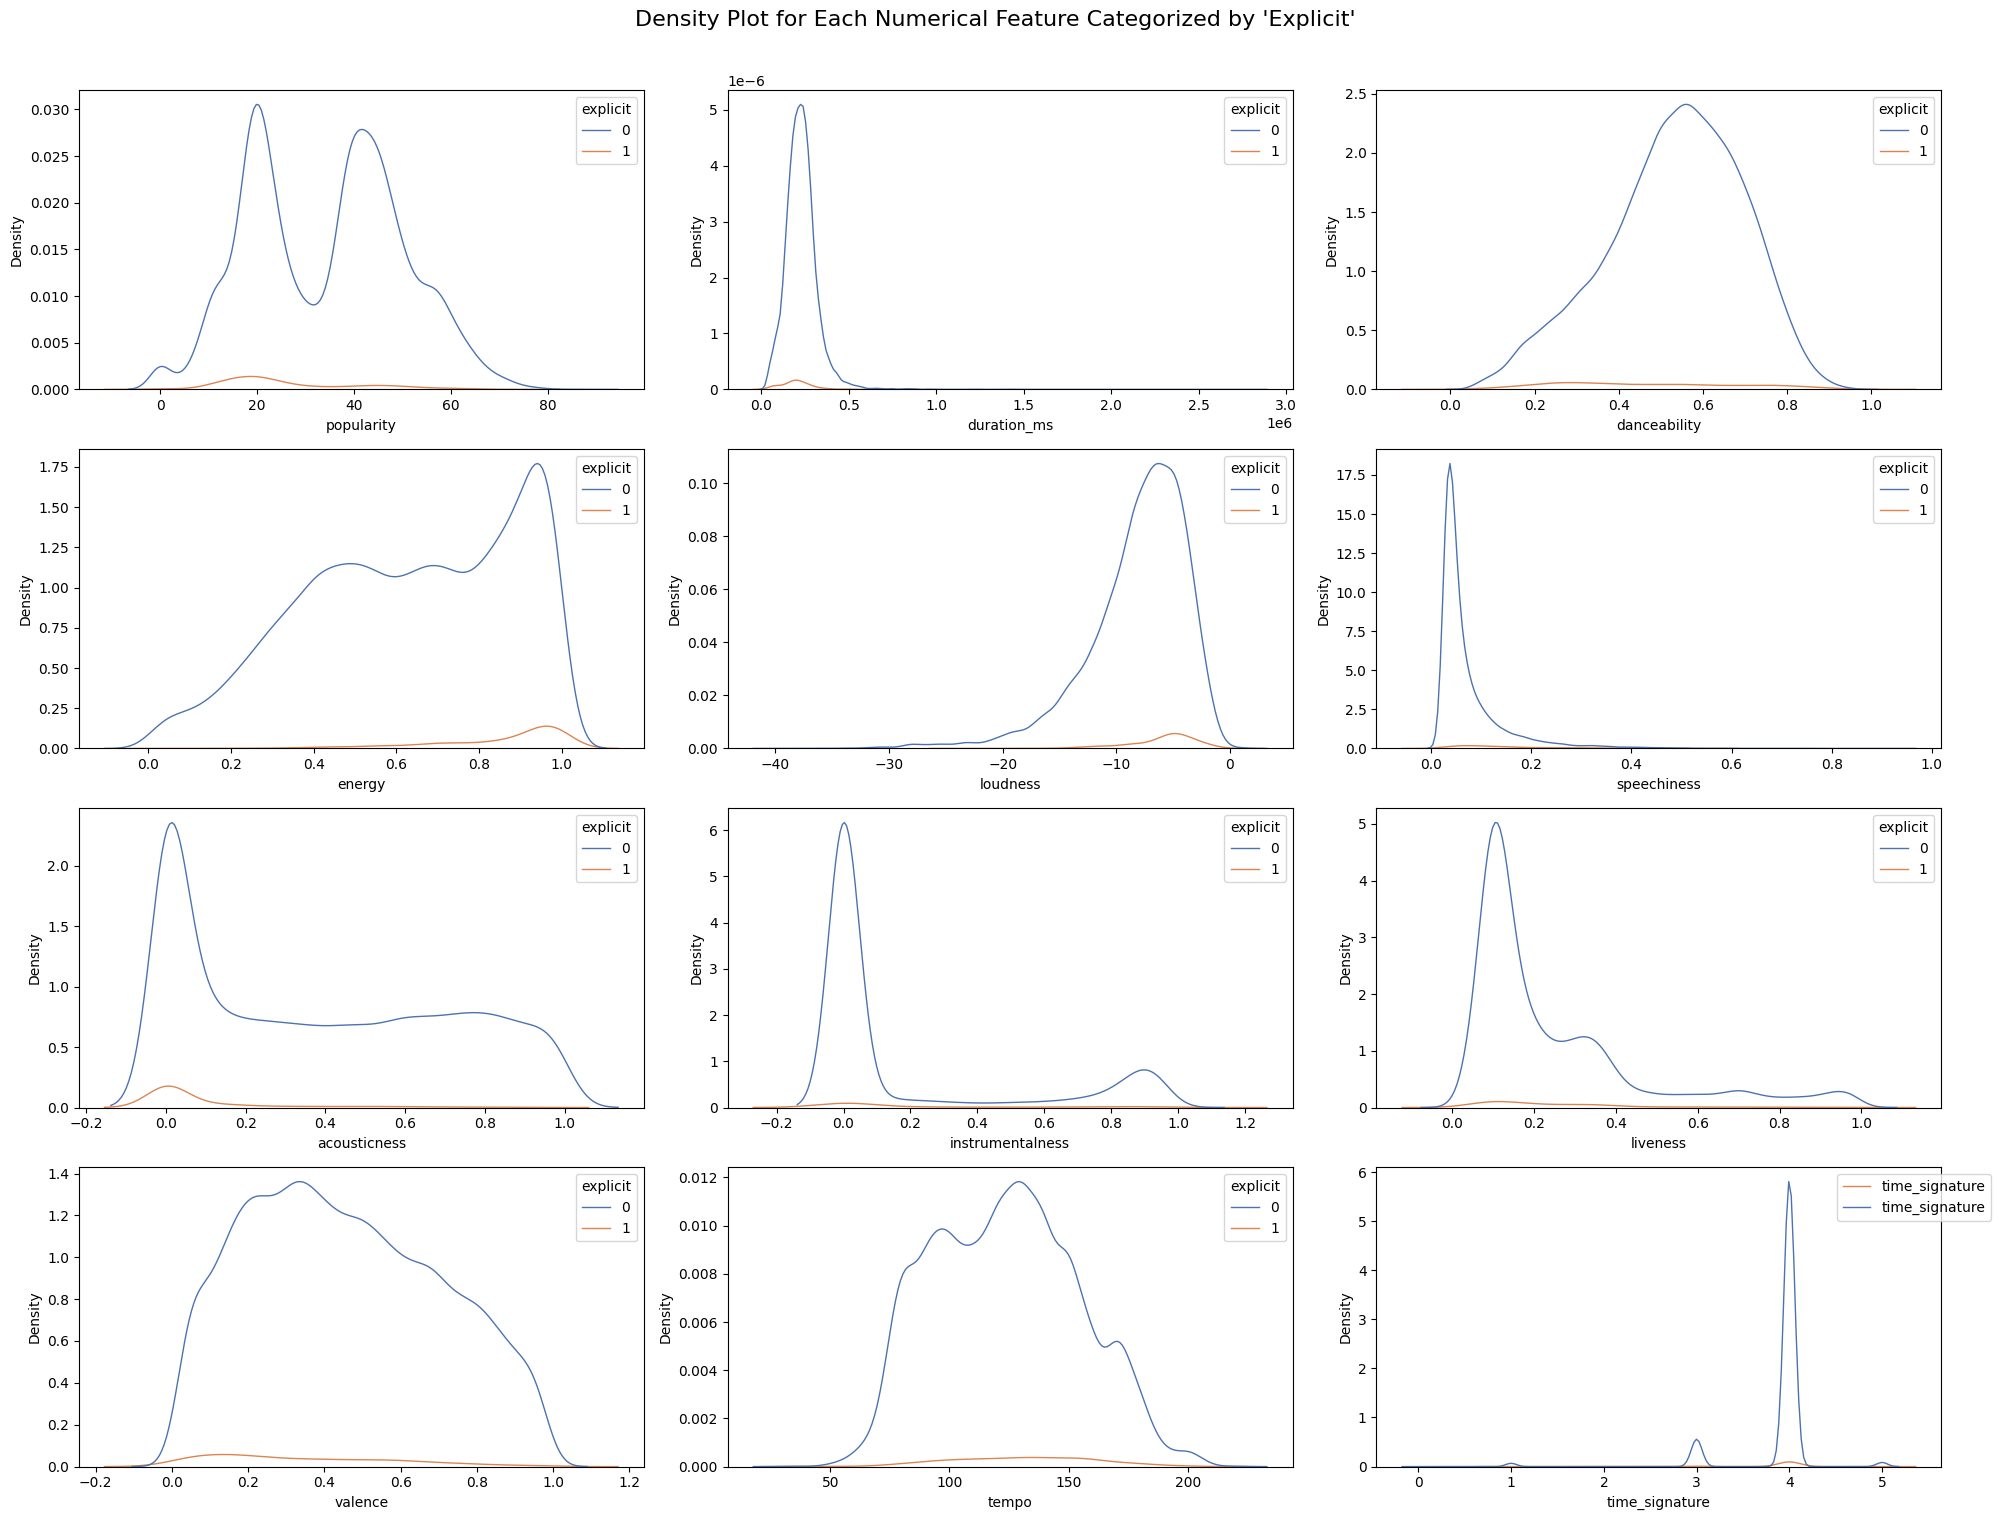

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(4,3, figsize=(20,15))
i=0
j=0
# Loop through the columns and create a KDE plot for each
for col in df.drop(columns=['track_genre','mode','explicit','key']).columns:
    sns.kdeplot(df[[col,'explicit']], x=col, ax=ax[i][j], label=col, lw=1, palette='deep', hue='explicit')
    j+=1
    if j==3:
      j=0
      i+=1

# Add a legend and title
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
plt.suptitle("Density Plot for Each Numerical Feature Categorized by 'Explicit'", y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

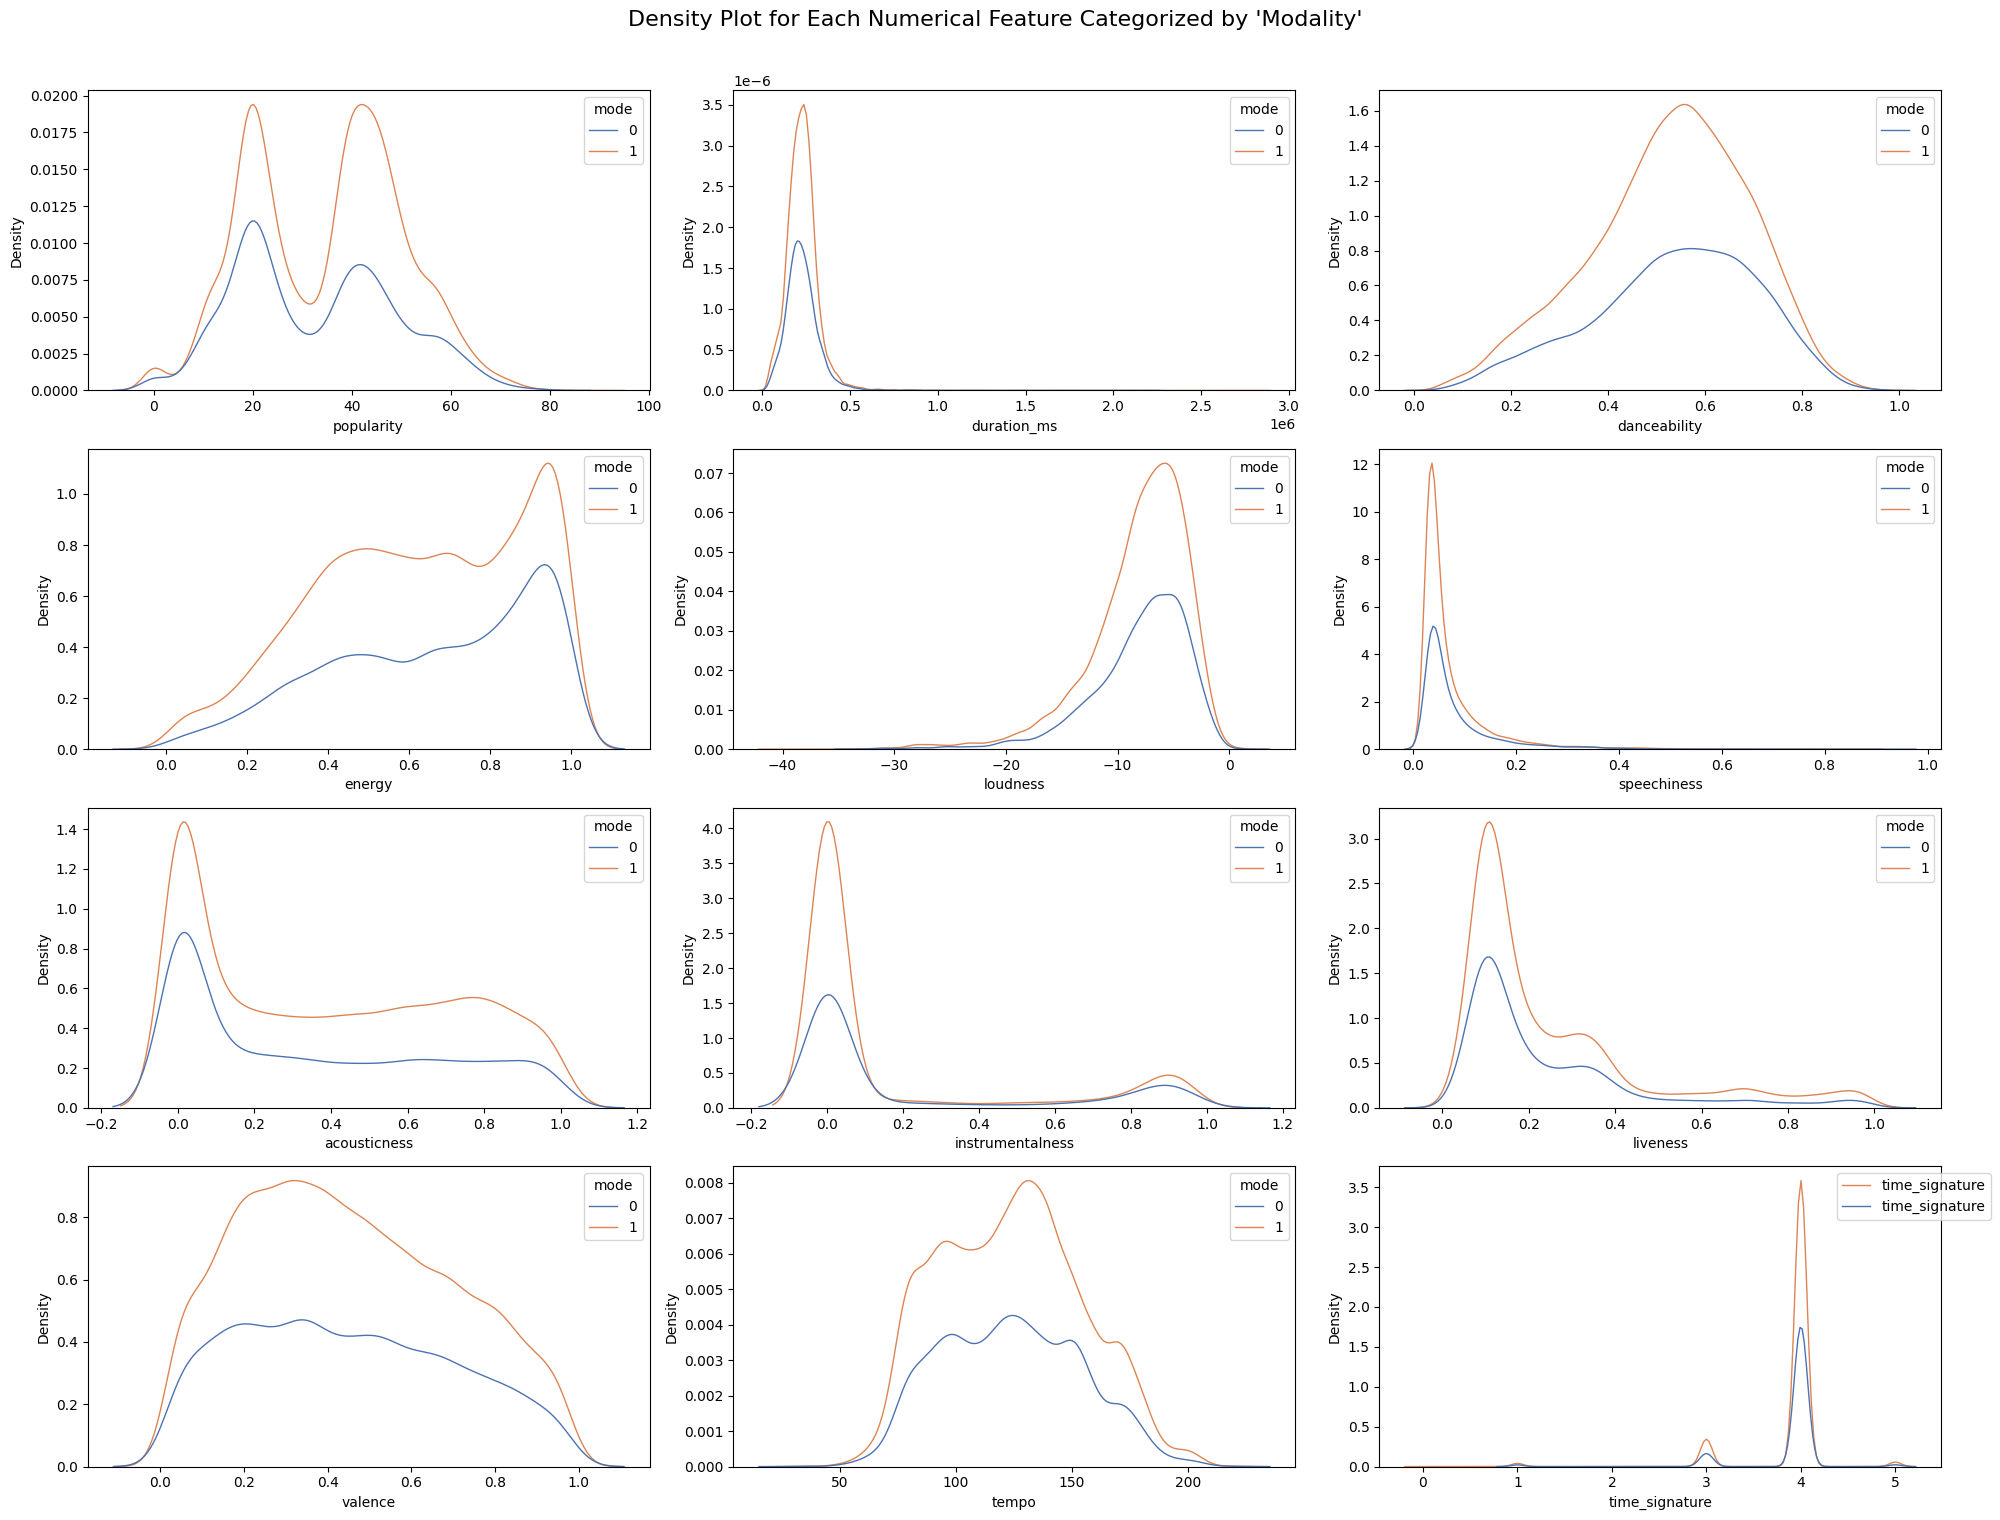

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(4,3, figsize=(20,15))
i=0
j=0
# Loop through the columns and create a KDE plot for each
for col in df.drop(columns=['track_genre','mode','explicit','key']).columns:
    sns.kdeplot(df[[col,'mode']], x=col, ax=ax[i][j], label=col, lw=1, palette='deep', hue='mode')
    j+=1
    if j==3:
      j=0
      i+=1

# Add a legend and title
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
plt.suptitle("Density Plot for Each Numerical Feature Categorized by 'Modality'", y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

We can also visualize the class distribution per genre for every categorical feature.

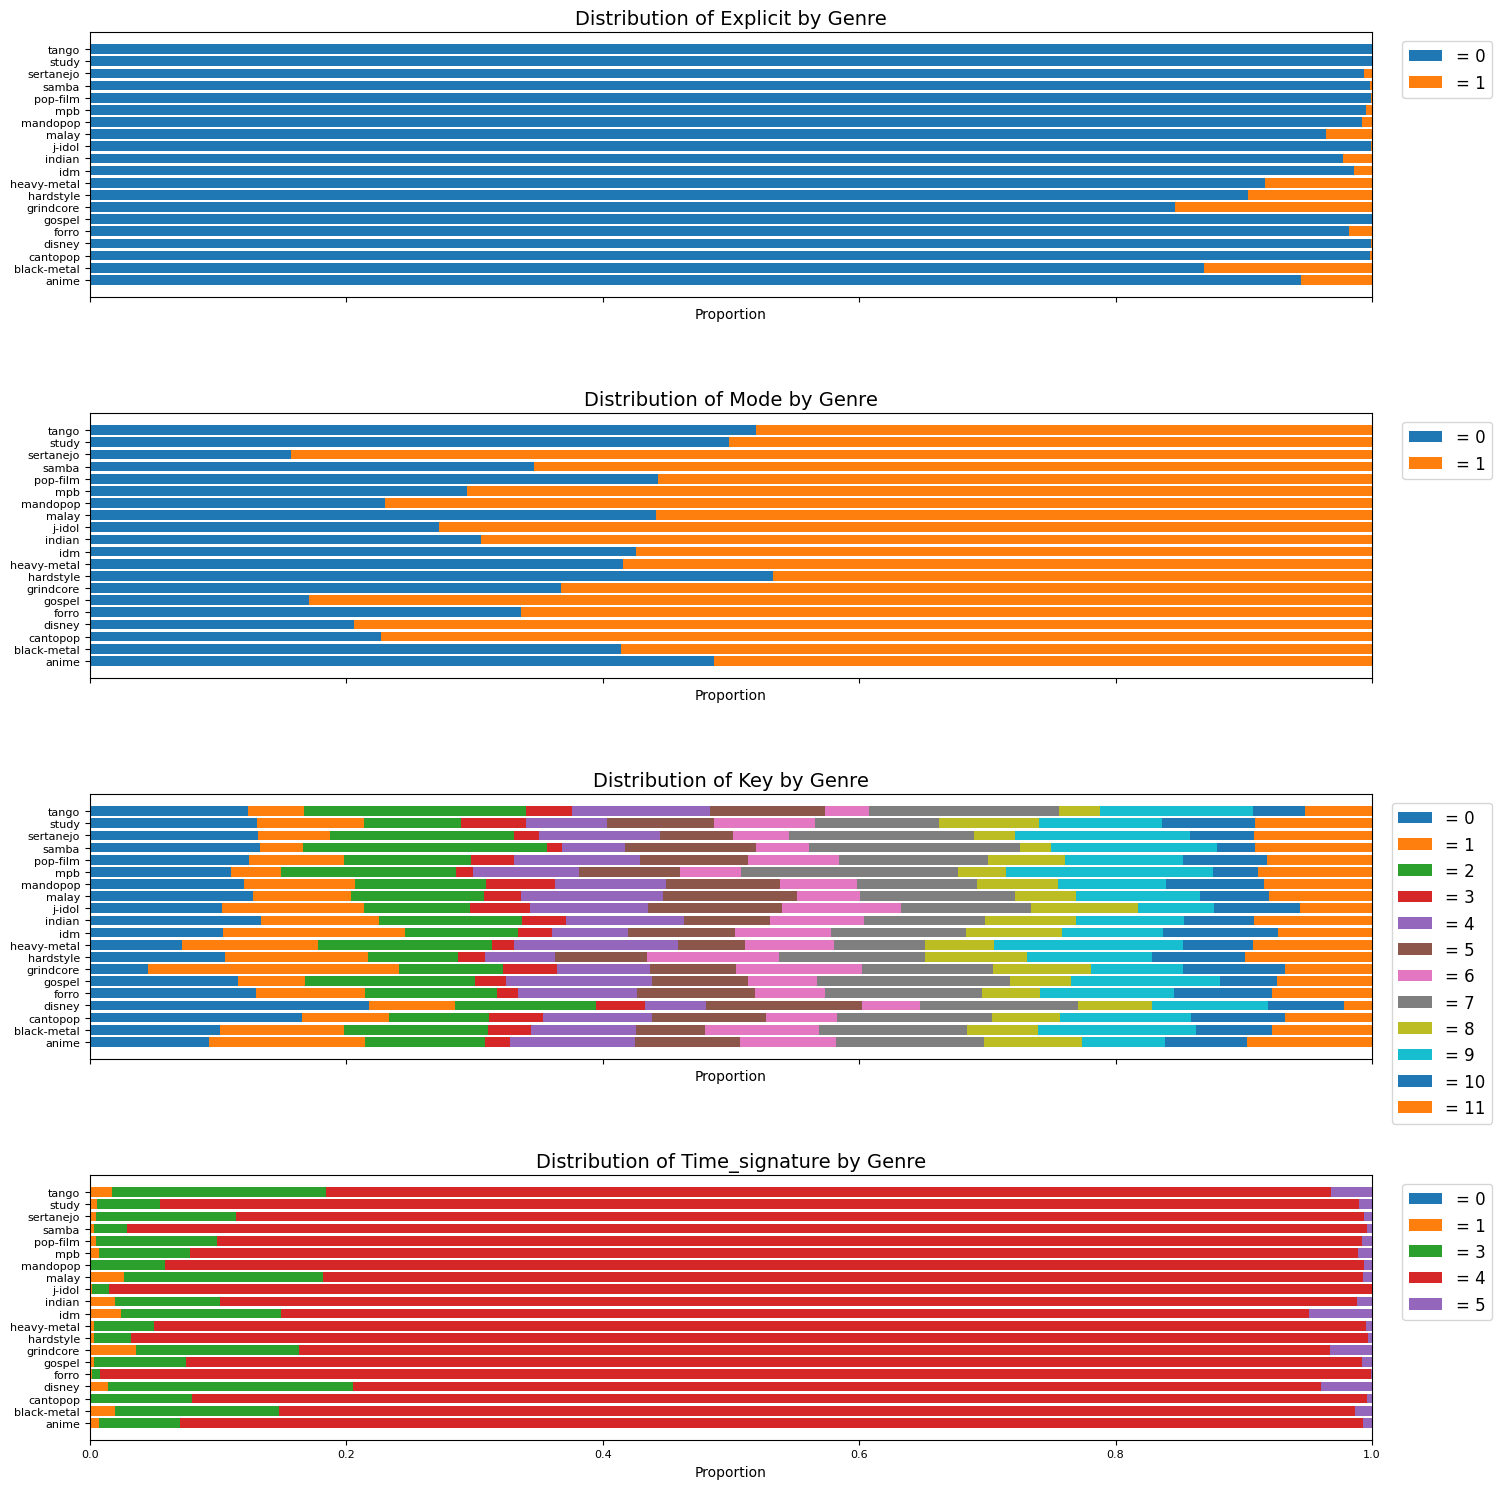

In [ ]:
# calculate the class proportions for each categorical feature
proportions = {}
for col in ['explicit', 'mode', 'key', 'time_signature']:
    proportions[col] = (df.groupby('track_genre')[col].value_counts(normalize=True).unstack(fill_value=0))


fig, axes = plt.subplots(4, 1, figsize=(15, 15), sharex=True)
genres = df['track_genre'].unique()  # 20 unique genres

# plot each category in a separate subplot
for ax, (col, prop_df) in zip(axes, proportions.items()):
    left_pos = np.zeros(20) # bars intialized at leftmost position

    # plot each class as a stacked bar
    for col_class in prop_df.columns:
        ax.barh(genres,
            prop_df[col_class].reindex(genres, fill_value=0),  # index replaced with genres
            left=left_pos,  # stack this class's bars on top of previous bars
            label=f"= {col_class}") # legend label
        left_pos += prop_df[col_class].reindex(genres, fill_value=0)

    ax.set_title(f"Distribution of {col.capitalize()} by Genre", fontsize=14)
    ax.set_xlabel("Proportion", fontsize=10)
    ax.set_xlim(0, 1)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='upper right',bbox_to_anchor=(1.1, 1),fontsize=12)

plt.tight_layout()
plt.show()

# iii. Regression Analysis

Since our main problem to address involves the classification of track genres, there is not much use in performing linear regression. However, in exploring the data and conducting some preliminary analyses before we settled on the primary topic of our project, we did use linear regression to predict the loudness of a song from its energy, seeing as they were fairly correlated from EDA. We also compared the fit to a ridge regression model, though the results indicate that ridge regression had minimal effect on the regression. The original model was simple enough to not have overfitted to the training data, as indicated by the similar mean-squared errors of the training and testing sets. Therefore, applying ridge regression did not impact the model, as no regularization was really needed.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df_ss[['energy']]
y = df_ss[['loudness']]

# create the training and testing (validation) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit a linear regression model regressing loudness on energy
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.5928131827456874

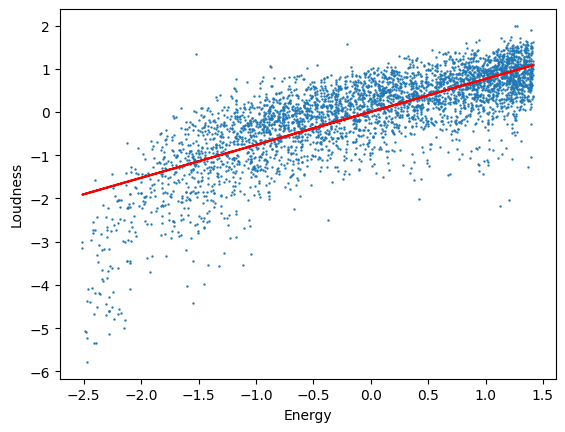

In [ ]:
# plot a scatterplot of the data and the regression line
plt.plot(X_test, reg.predict(X_test), color = 'r')
plt.scatter(X_test, y_test, s = 0.5)
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [ ]:
train_MSE = mean_squared_error(y_train, reg.predict(X_train))
test_MSE = mean_squared_error(y_test, reg.predict(X_test))
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Train MSE:  0.403851304649083
Test MSE:  0.4318246345503502


In [ ]:
from sklearn.linear_model import Ridge

# employ ridge regression with alpha = 1
lin_with_regularization = Ridge(alpha = 1)
lin_with_regularization.fit(X_train, y_train)
lin_with_regularization.score(X_test, y_test)

0.5928105584823308

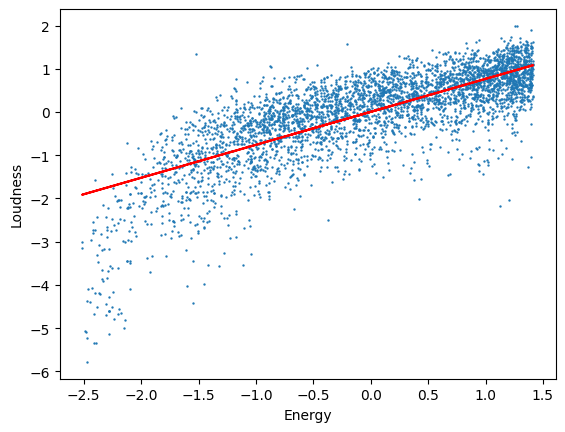

In [ ]:
plt.plot(X_test, lin_with_regularization.predict(X_test), color = 'r')
plt.scatter(X_test, y_test, s = 0.5)
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [ ]:
train_MSE = mean_squared_error(y_train, lin_with_regularization.predict(X_train))
test_MSE = mean_squared_error(y_test, lin_with_regularization.predict(X_test))
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Train MSE:  0.40385130693463783
Test MSE:  0.43182741760107024


#IV. Logistic Regression Analysis

How was logistic regression analysis applied in your project? What did you learn about your data set from this analysis and were you able to use this analysis for feature importance? Was regularization needed?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from tabulate import tabulate

We take a subset of the whole data set to be able to build the logistic regression model and visualize the results efficiently. We also split the data into training and testing sets, with a split of 80/20.

In [ ]:
# Build the logistic regression model
pipeline = make_pipeline(LogisticRegression(penalty='l1', solver='saga', max_iter=10000))
pipeline.fit(X_train_ss, y_train)

# Determine the model's accuracy
accuracy = pipeline.score(X_test_ss, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.39


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score_logistic = cross_val_score(pipeline, X_test_ss, y_test_ss, cv=5, scoring='accuracy')
cv_score_logistic

array([0.55068836, 0.53383459, 0.51879699, 0.55513784, 0.53508772])

In [ ]:
np.mean(cv_score_logistic)

0.5389597272279574

We can get an idea of how each feature is used in the model. The following bar plots are separated by genre, and show the feature importance in each.

In [ ]:
# Determine the importance of each of the features
model = pipeline.named_steps['logisticregression']

feature_importance = pd.DataFrame(model.coef_, columns=X_train_ss.columns, index=genres)
feature_importance['Genre'] = model.classes_

feature_importance_melted = feature_importance.melt(id_vars='Genre', var_name='Feature', value_name='Importance')

average_importance = feature_importance_melted.groupby('Feature')['Importance'].mean().sort_values(ascending=False).index
feature_importance_melted['Feature'] = pd.Categorical(feature_importance_melted['Feature'], categories=average_importance, ordered=True)

# Build bar plots for each of the genres, showing the importance of each feature
fig, axes = plt.subplots(4, 5, figsize=(20, 10), sharex=True)

for i, genre in enumerate(genres):
    ax = axes[i // 5, i % 5]
    sns.barplot(x='Importance', y='Feature', data=feature_importance_melted[feature_importance_melted['Genre'] == genre], ax=ax)
    ax.set_title(f'{genre.capitalize()} Feature Importance')

plt.tight_layout()
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'named_steps'

We can see that there is a clear difference in the importance of features like popularity, instrumetalness, and energy versus the less important features like mode, time signature, and key.

+-------------+------------+-------------+----------+--------------+---------+---------+----------+---------+-------------+--------------+------------------+----------+---------+---------+----------------+-------------+
|             | popularity | duration_ms | explicit | danceability | energy  |   key   | loudness |  mode   | speechiness | acousticness | instrumentalness | liveness | valence |  tempo  | time_signature |    Genre    |
+-------------+------------+-------------+----------+--------------+---------+---------+----------+---------+-------------+--------------+------------------+----------+---------+---------+----------------+-------------+
|    anime    |   2.1316   |   -0.3808   |  0.3165  |   -0.3596    | 0.1665  |   0.0   |  0.0001  | -0.1936 |    0.391    |   -0.5373    |      1.617       |  -0.088  | 0.0087  | -0.103  |    -0.0874     |    anime    |
| black-metal |  -1.0447   |   0.4631    |  0.6202  |   -2.1651    | 2.5019  | 0.0479  | -0.4789  | -0.0264 |   -0.5885 

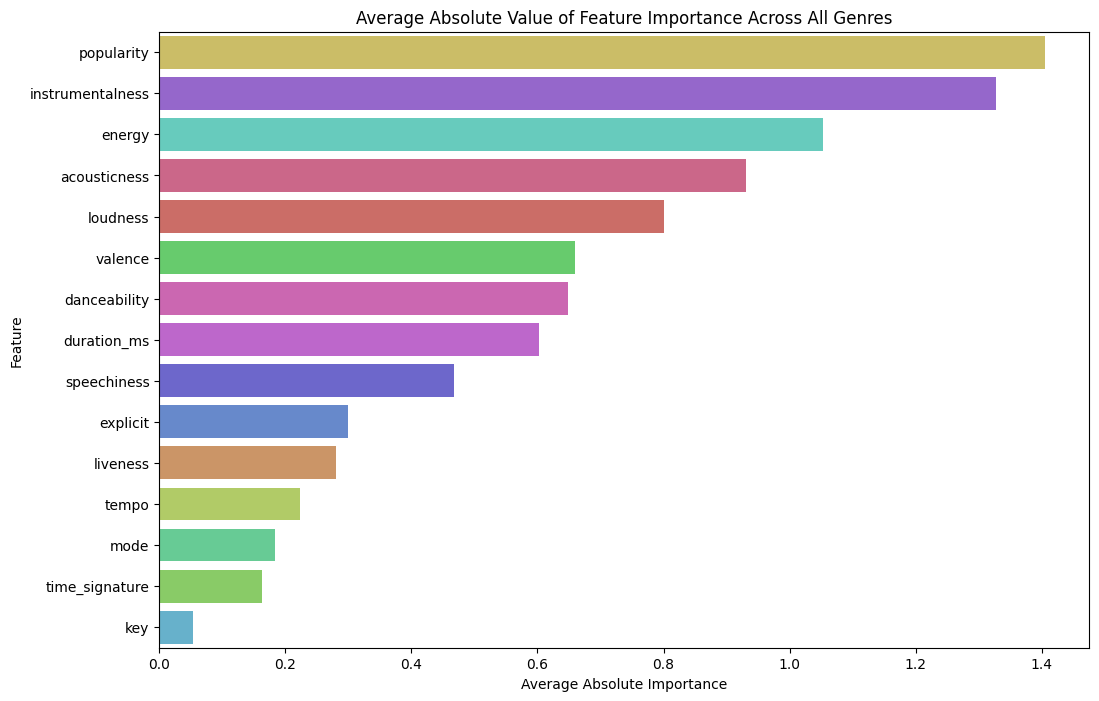

In [ ]:
# Print out the importance values for each of the features by genre
print(tabulate(feature_importance.round(4), headers='keys', tablefmt='pretty', numalign='center', stralign='center'))

# Calculate the average absolute value of importance for each feature
average_abs_importance = feature_importance_melted.groupby('Feature', observed=False)['Importance'].apply(lambda x: np.mean(np.abs(x)))

# Create a DataFrame for plotting
average_abs_importance_df = average_abs_importance.reset_index().sort_values(by='Importance', ascending=False)

# Plot the average absolute value of importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=average_abs_importance_df, hue='Feature', palette='hls', order=average_abs_importance_df.sort_values('Importance', ascending=False).Feature)
plt.title('Average Absolute Value of Feature Importance Across All Genres')
plt.xlabel('Average Absolute Importance')
plt.ylabel('Feature')
plt.show()

# V. KNN, Decision Trees, and Random Forest

## KNN

We can fit a KNN model to the Spotify data by encoding the categorical response variable and using split data into 80/20 training and testing.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

df_knn = df.copy()
label_encoder = LabelEncoder()

df_knn['track_genre'] = label_encoder.fit_transform(df_knn['track_genre'])
X_train, X_test, y_train, y_test = train_test_split(df_knn.drop(['track_genre'], axis=1), df_knn.track_genre, test_size=0.2)
X_train['explicit'] = X_train['explicit'].astype(int)
X_test['explicit'] = X_test['explicit'].astype(int)

k = 14
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
mse = mean_squared_error(y_train, knn_train_pred)
rmse = sqrt(mse)
print(f"rMSE: {rmse}")

knn_score = knn.score(X_test, y_test)
print(f"kNN Accuracy: {knn_score}")

rMSE: 4.150400707098618
kNN Accuracy: 0.39481686165413354


Cross Validation:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 26)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best k
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k: {best_k}")

# Train the model with the optimal k
knn_optimal = KNeighborsRegressor(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# Predict and evaluate
knn_train_pred_optimal = knn_optimal.predict(X_train)
mse_optimal = mean_squared_error(y_train, knn_train_pred_optimal)
rmse_optimal = sqrt(mse_optimal)
print(f"Optimal rMSE: {rmse_optimal}")

knn_test_pred_optimal = knn_optimal.predict(X_test)
knn_score_optimal = knn_optimal.score(X_test, y_test)
print(f"Optimal kNN Accuracy: {knn_score_optimal}")


Optimal k: 16
Optimal rMSE: 4.192680683848057
Optimal kNN Accuracy: 0.39222878645282877


## Decision Tree

The usefulness of a Decision tree was explored in the following section. We set some parameters, such as a max depth of 20 splits, and a minimum sample in each of 20. Gini is used as a criterion. We ended up with a 53% overall accuracy.

In [ ]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import tree
from joblib import Parallel, delayed
from itertools import product
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

X_train, X_test, y_train, y_test = train_test_split(df_knn.drop(['track_genre'], axis=1),
                                                    df_knn.track_genre, test_size=0.3)

music_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=20, max_depth=20)
music_tree.fit(X_train, y_train)

music_tree_pred = music_tree.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, music_tree_pred))
print("Accuracy: \n", metrics.accuracy_score(y_test, music_tree_pred))
print(classification_report(y_test, music_tree_pred))

Confusion Matrix: 
 [[138   8   6  11   2   7   0  11   4   3  18   6  10  10   5  21   3  12
   12   0]
 [  7 196   1   1   0   1  25  11  41   7   0   4   2   0   1   0   0   1
    0   0]
 [  3   3  83  11  12  28   0   4   4   2  16   8  30  48  16   3   7   6
    3  11]
 [ 12   2  23 159   3   2   0   6   4  11  15   6  15   7   6   7   1   0
   16  20]
 [  9   0   1   1 199  16   0   0   0   0   7   2   1   0  20   1  20  38
    0   0]
 [  5   5  19   0  19 165   0   2   0   1   8   0   7   9  29   0  11   6
    0   2]
 [  0  23   0   3   0   0 246   4   4   8   0   1   2   0   0   0   0   0
    1   2]
 [ 17   8   2   3   0   2   2 187  19   2   2  21  12   6   2   2   1   2
    0   1]
 [ 10  49   6   3   0   6   2  16 168   0   1  25   7   3   3   0   2   0
    0   1]
 [ 10   5   5   2   0   0  12   7   3 210   5   3   4   0   2   4   1   0
   22   7]
 [ 17   0  11   8  12  20   0   2   0   3  93   1   5  22  31  49   4  14
    4   1]
 [ 11   5   7   4   6   3   3  21  19   1   3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=123)


grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.5552691935380942
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       287
           1       0.70      0.65      0.67       298
           2       0.31      0.28      0.29       298
           3       0.60      0.44      0.51       315
           4       0.58      0.59      0.59       315
           5       0.51      0.58      0.54       288
           6       0.86      0.85      0.85       294
           7       0.65      0.64      0.64       291
           8       0.63      0.58      0.60       302
           9       0.76      0.71      0.74       302
          10       0.29      0.30      0.30       297
          11       0.63      0.62      0.62       291
          12       0.41      0.34      0.37       293
          13       0.

In [ ]:
cv_score_dt = cross_val_score(dt, X_test, y_test, cv=5, scoring='accuracy')
cv_score_dt

array([0.4933222 , 0.47495826, 0.46616541, 0.50459482, 0.48788638])

In [ ]:
np.mean(cv_score_dt)

0.4853854167974193

The following plot shows the process of the decision tree. The different labels are color coded in each of the boxes, with the strength of the predictions represented by the transparency of the color.

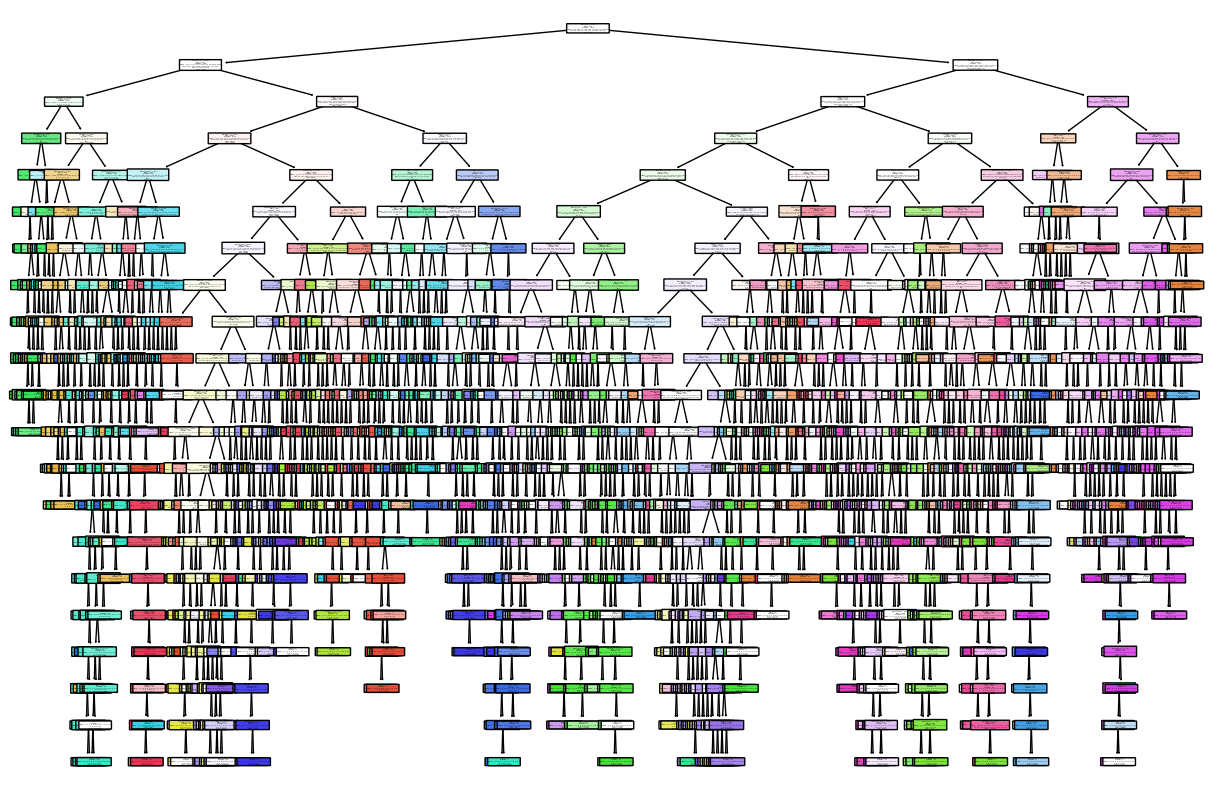

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(music_tree, filled=True, feature_names=list(X_train.columns), class_names=genres, rounded=True)
plt.show()

## Random Forest

When fitting the Random Forest model, we can see some similarity in the feature importance to the Logistic Regression.

In [ ]:
music_rf = RandomForestClassifier(random_state=123)
music_rf.fit(X_train, y_train)

music_rf_pred = music_rf.predict_proba(X_test)

music_rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': music_rf.feature_importances_
}).sort_values('importance', ascending=False).reset_index().drop('index', axis=1)
music_rf_importance

feature  importance
0         popularity    0.167209
1       acousticness    0.100110
2        duration_ms    0.099755
3             energy    0.082464
4           loudness    0.080915
5            valence    0.078397
6       danceability    0.077844
7   instrumentalness    0.074749
8              tempo    0.067084
9        speechiness    0.062974
10          liveness    0.055623
11               key    0.031532
12              mode    0.011504
13    time_signature    0.007311
14          explicit    0.002531

The Random Forest feature importance is represented in the bar plot shown below.

In [ ]:
import plotly.express as px

px.bar(music_rf_importance, y='feature', x='importance',
       orientation='h', title='Impurity Importance for Random Forest', height=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.6642326749484407
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       287
           1       0.75      0.75      0.75       298
           2       0.49      0.38      0.43       298
           3       0.77      0.62      0.69       315
           4       0.63      0.68      0.65       315
           5       0.57      0.72      0.64       288
           6       0.88      0.89      0.89       294
           7       0.82      0.76      0.79       291
           8       0.70      0.70      0.70       302
           9       0.84      0.81      0.82       302
          10       0.46      0.38      0.41       297
          11       0.73      0.74      0.74       291
          12       0.53      0.53      0.53       293
          13       0.45      0.38      0.41       299
          14       0.37      0.

In [ ]:
cv_score_rf = cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy')
cv_score_rf

array([0.63856427, 0.61936561, 0.63074353, 0.64828739, 0.63324979])

In [ ]:
np.mean(cv_score_rf)

0.63404211697859

# VI. PCA and Clustering

Principal Component Analysis is a technique for dimensionality reduction when a data set is very high-dimensional (i.e., contains many features). The goal is to simplify the data set while retaining as much information or variability in the data as possible.

Clustering is an unsupervised machine learning technique that creates groups in the data. For this clustering analysis, we attempt to cluster based on time signature.

Clustering is susceptible to a phenomenon known as the curse of dimensionality, in which data set is so high-dimensional and complex that clustering is difficult to perform and largely inaccurate, as the more complex a data set is, the less meaningful distance metrics become. Thus, reducing the dimension of the data set may aid in clustering effectiveness. Our approach involves performing k-means clustering on the data, then performing principal component analysis to create a transformed (simpler) data set, performing k-means clustering again on the new PCA-transformed data, and finally comparing evaluation metrics for the two clustering schemes.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

In [ ]:
ss = preprocessing.StandardScaler()
df_clustering = df_raw.drop(columns='track_genre')
# Create a standardized version of the data for modeling purposes after EDA
num_cols = df_clustering.columns.values.tolist()
num_cols.remove('time_signature')
df_clustering[num_cols] = ss.fit_transform(df_clustering.drop(columns='time_signature'))

In [ ]:
set(df_clustering['time_signature'])

In [ ]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(df_clustering.drop(columns='time_signature'))

In [ ]:
for i in np.arange(0, len(kmeans.labels_)):
  if kmeans.labels_[i] > 1:
    kmeans.labels_[i] += 1
set(kmeans.labels_)

In [ ]:
print(silhouette_score(df_clustering.drop(columns='time_signature'), kmeans.labels_))

In [ ]:
pca_U, pca_d, pca_V = np.linalg.svd(df_clustering.drop(columns='time_signature'))

In [ ]:
prop_var = np.square(pca_d) / sum(np.square(pca_d))
scree_data = pd.DataFrame(
{"PC": 1 + np.arange(0, prop_var.shape[0]),
"variability_explained": prop_var.round(4),
"cumulative_variability_explained": prop_var.cumsum().round(4)
})
scree_data.head(20)

In [ ]:
px.line(x=np.arange(14),
y=scree_data.iloc[range(14), :].loc[:, 'variability_explained'],
labels={"x": "PC",
"y": "Proportion explained"},
width=600, height=400)

We attempted to perform Principal Component Analysis on the data to prepare for clustering based on time signature. The scree plot indicates that the first two principal components capture about 34.16% of the variability in the data, and after that, each principal component makes a small, consistent contribution. Unfortunately, keeping only the first two principal components would simply result in a data set that does not capture nearly enough information from the original data to be usable. Moreover, if we want to retain most of the information in the original data, let's say 90%, then we would need to keep the first ten principal components, which is not a very successful dimensionality reduction down from fourteen original features.

In [ ]:
X_train_pca = np.dot(df_clustering.drop(columns='time_signature'), pca_V[np.arange(0, 9)].T)
X_train_pca = pd.DataFrame(X_train_pca, columns=['PC' + str(x) for x in np.arange(1, 10)])
X_train_pca.head()

In [ ]:
kmeans_new = KMeans(n_clusters=5)
y_kmeans = kmeans_new.fit_predict(X_train_pca)

In [ ]:
for i in np.arange(0, len(kmeans_new.labels_)):
  if kmeans_new.labels_[i] > 1:
    kmeans_new.labels_[i] += 1
set(kmeans_new.labels_)

In [ ]:
print(silhouette_score(X_train_pca, kmeans_new.labels_))

Keeping the first nine principal components and clustering with the new PCA transformed data set, we obtain only a slightly higher silhouette score of 0.1296, compared to a score of 0.1098 before performing PCA. Silhouette score is a measure of how tightly and distinctly the data is clustered, where 1 is tightly clustered and 0 is loosely (and indistinctively) clustered. It is one measure of effectiveness for a clustering algorithm. The calculated silhouette scores for both clustering schemes suggests that the effects of PCA are minimal for this data set, so we will not employ it in the main analysis of our classification of track genres.

# VI. Neural Networks

In [ ]:
df_NN = df.copy()
df_NN.head()

popularity  duration_ms  explicit  danceability    energy       key  \
5000    2.352090     0.252651 -0.181294      0.063329  0.812652  0.215398   
5001    2.479707     0.127650 -0.181294     -0.576031  1.159506 -0.912980   
5002    3.117792    -0.366398 -0.181294      0.282539  1.187097 -1.195074   
5003    2.479707     0.108868 -0.181294     -0.137612  0.982138  0.497493   
5004    1.650196     0.208297 -0.181294      0.976702  0.524921 -1.477168   

      loudness      mode  speechiness  acousticness  instrumentalness  \
5000  1.212446 -1.349109    -0.285892     -1.094908         -0.541600   
5001  1.222452  0.741230    -0.347826     -1.131754         -0.119504   
5002  0.657329  0.741230     0.416500     -1.125528         -0.542039   
5003  1.206533 -1.349109     0.151871     -0.982160         -0.542049   
5004  0.640500 -1.349109    -0.366125     -1.079190         -0.540688   

      liveness   valence     tempo  time_signature track_genre  
5000 -0.382670  0.301861  0.178699        0.241705       anime  
5001  0.341987 -0.256109 -1.062736        0.241705       anime  
5002 -0.721608 -0.622775 -0.718561        0.241705       anime  
5003 -0.678954 -0.463355  0.372413        0.241705       anime  
5004 -0.593647  0.214180  0.146523        0.241705       anime

From the feature importance derived from random forests, we select the top 10 features to reduce noise from irrelevant features. To optimize model performance, we designed three feedforward neural network architectures with 4, 6, and 10 layers, incorporating dropout and batch normalization layers to mitigate overfitting and stabilize training.

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
X = df_NN.drop(['track_genre', 'mode', 'explicit', 'liveness', 'key', 'time_signature'], axis = 1)
y = LabelEncoder().fit_transform(df_NN['track_genre'])

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=2000, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=1000, random_state=123, stratify=y_temp)

# Convert to categorical (onehot encoding matrices)
y_train = to_categorical(y_train, num_classes=20)
y_valid = to_categorical(y_valid, num_classes=20)
y_test = to_categorical(y_test, num_classes=20)

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.models import Sequential, load_model, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.regularizers import L1L2, L2

class SequentialModel:
    def __init__(self):
        self.model = Sequential()

    def load_model(self, filepath):
        print('[Model] Loading model from file %s' % filepath)
        self.model = load_model(filepath)

    def build_model(self, config):
        """ Virtual Function """
        return

    def train(self, x, y, x_val, y_val, config):
        """ Virtual Function """
        return

    def evaluate(self, x_test, y_test, verbose=1):
        return self.model.evaluate(x_test,  y_test, verbose=verbose)

    def predict(self, x_test, verbose=1):
        return self.model.predict(x_test, verbose=verbose)

class Four_Layer_NN(SequentialModel):
    def __init__(self):
        super(Four_Layer_NN, self).__init__()

    def build_model(self, config):
        model = self.model

        input_shape = config["input_shape"]
        lr = config.get('lr', 0.001)
        decay = config.get("decay", 0.01)
        dropout = config.get('dropout', 0.2)

        model.add(Dense(64, kernel_regularizer=L2(l2=0.01), input_shape=input_shape, activation='elu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(16, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(20, kernel_regularizer=L2(l2=0.01), activation='softmax'))
        optimizer = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999,
                         amsgrad=False, epsilon=1e-8, decay=decay)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        print(model.summary())
        print("Model compiled.")

    def train(self, x, y, x_val, y_val, config):
        history = self.model.fit(x, y, epochs=config['epochs'], batch_size=config['batch_size'],
                                 validation_data=(x_val, y_val), shuffle=True,
                                )
        return history

class Six_Layer_NN(SequentialModel):
    def __init__(self):
        super(Six_Layer_NN, self).__init__()

    def build_model(self, config):
        model = self.model

        input_shape = config["input_shape"]
        lr = config.get('lr', 0.001)
        decay = config.get("decay", 0.01)
        dropout = config.get('dropout', 0.2)

        model.add(Dense(32, kernel_regularizer=L2(l2=0.01), input_shape=input_shape, activation='elu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(16, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(20, kernel_regularizer=L2(l2=0.01), activation='softmax'))
        optimizer = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999,
                         amsgrad=False, epsilon=1e-8, decay=decay)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        print(model.summary())
        print("Model compiled.")

    def train(self, x, y, x_val, y_val, config):
        history = self.model.fit(x, y, epochs=config['epochs'], batch_size=config['batch_size'],
                                 validation_data=(x_val, y_val), shuffle=True,
                                )
        return history

class Ten_Layer_NN(SequentialModel):
    def __init__(self):
        super(Ten_Layer_NN, self).__init__()

    def build_model(self, config):
        model = self.model

        input_shape = config["input_shape"]
        lr = config.get('lr', 0.001)
        decay = config.get("decay", 0.01)
        dropout = config.get('dropout', 0.2)

        model.add(Dense(32, kernel_regularizer=L2(l2=0.01), input_shape=input_shape, activation='elu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization(axis=1))

        model.add(Dense(16, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(8, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(16, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization(axis=1))
        model.add(Dropout(dropout))

        model.add(Dense(20, kernel_regularizer=L2(l2=0.01), activation='softmax'))
        optimizer = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999,
                         amsgrad=False, epsilon=1e-8, decay=decay)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        print(model.summary())
        print("Model compiled.")

    def train(self, x, y, x_val, y_val, config):
        history = self.model.fit(x, y, epochs=config['epochs'], batch_size=config['batch_size'],
                                 validation_data=(x_val, y_val), shuffle=True,
                                )
        return history

### Four Layer Neural Network

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64]
dropout = [0.2,0.3]
best_accuracy = 0
input_shape = X_train.shape[1:]
best_history = None
best_model = None

for lr in learning_rates:
    for batch in batch_sizes:
        for d in dropout:
            model = Four_Layer_NN()
            config = {
                        'input_shape': input_shape,
                        'epochs': 50,
                        'dropout': d,
                        'batch_size': batch,
                        'lr': lr
                    }
            model.build_model(config)
            history = model.train(X_train, y_train, X_valid, y_valid, config)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"Accuracy: {accuracy:.4f}")

            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch, 'dropout': d}
                best_history = history

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1780 - loss: 3.0373 - val_accuracy: 0.4450 - val_loss: 2.0548
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3697 - loss: 2.2233 - val_accuracy: 0.5010 - val_loss: 1.8159
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4088 - loss: 2.0432 - val_accuracy: 0.5120 - val_loss: 1.7264
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4218 - loss: 1.9605 - val_accuracy: 0.5350 - val_loss: 1.6675
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4351 - loss: 1.9100 - val_accuracy: 0.5220 - val_loss: 1.6223
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4328 - loss: 1.8601 - val_accuracy: 0.5340 - val_loss: 1.5859
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4434 - loss: 1.8339 - val_accuracy: 0.5450 - val_loss: 1.5718
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4552 - loss: 1.79

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1392 - loss: 3.1796 - val_accuracy: 0.4310 - val_loss: 2.1901
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3063 - loss: 2.3979 - val_accuracy: 0.4840 - val_loss: 1.9408
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3497 - loss: 2.2005 - val_accuracy: 0.4820 - val_loss: 1.8115
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3556 - loss: 2.1103 - val_accuracy: 0.4990 - val_loss: 1.7418
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3774 - loss: 2.0385 - val_accuracy: 0.5160 - val_loss: 1.6971
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3916 - loss: 1.9840 - val_accuracy: 0.5100 - val_loss: 1.6656
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3994 - loss: 1.9680 - val_accuracy: 0.5110 - val_loss: 1.6354
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4046 - loss: 1.94

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1330 - loss: 3.2178 - val_accuracy: 0.4090 - val_loss: 2.3290
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3270 - loss: 2.3771 - val_accuracy: 0.4890 - val_loss: 1.9604
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3883 - loss: 2.1360 - val_accuracy: 0.4960 - val_loss: 1.8188
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4204 - loss: 2.0104 - val_accuracy: 0.5210 - val_loss: 1.7306
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4348 - loss: 1.9300 - val_accuracy: 0.5170 - val_loss: 1.6821
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4455 - loss: 1.8950 - val_accuracy: 0.5330 - val_loss: 1.6513
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4511 - loss: 1.8444 - val_accuracy: 0.5260 - val_loss: 1.6071
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4621 - loss: 1.80

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1321 - loss: 3.2469 - val_accuracy: 0.3780 - val_loss: 2.4257
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2629 - loss: 2.5509 - val_accuracy: 0.4340 - val_loss: 2.0676
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3331 - loss: 2.2959 - val_accuracy: 0.4610 - val_loss: 1.9115
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3580 - loss: 2.1559 - val_accuracy: 0.4920 - val_loss: 1.8289
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3758 - loss: 2.0828 - val_accuracy: 0.4990 - val_loss: 1.7672
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3900 - loss: 2.0379 - val_accuracy: 0.5000 - val_loss: 1.7222
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3987 - loss: 2.0096 - val_accuracy: 0.5030 - val_loss: 1.6888
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 1.96

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2960 - loss: 2.4303 - val_accuracy: 0.4610 - val_loss: 1.7796
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4002 - loss: 1.9871 - val_accuracy: 0.4890 - val_loss: 1.6952
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4160 - loss: 1.9398 - val_accuracy: 0.4970 - val_loss: 1.7294
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4138 - loss: 1.9244 - val_accuracy: 0.4890 - val_loss: 1.6648
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4153 - loss: 1.9200 - val_accuracy: 0.5170 - val_loss: 1.6206
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4168 - loss: 1.8948 - val_accuracy: 0.5250 - val_loss: 1.6377
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4193 - loss: 1.9140 - val_accuracy: 0.4990 - val_loss: 1.6517
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4228 - loss: 1.88

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2662 - loss: 2.5647 - val_accuracy: 0.4310 - val_loss: 1.8320
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3500 - loss: 2.1314 - val_accuracy: 0.4280 - val_loss: 1.8507
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3705 - loss: 2.0805 - val_accuracy: 0.4560 - val_loss: 1.7507
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3718 - loss: 2.0558 - val_accuracy: 0.4840 - val_loss: 1.7455
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3754 - loss: 2.0628 - val_accuracy: 0.4960 - val_loss: 1.7070
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3756 - loss: 2.0323 - val_accuracy: 0.4730 - val_loss: 1.7336
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3851 - loss: 2.0199 - val_accuracy: 0.4820 - val_loss: 1.7362
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3775 - loss: 2.04

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2959 - loss: 2.5100 - val_accuracy: 0.4170 - val_loss: 1.8895
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4202 - loss: 1.9207 - val_accuracy: 0.4850 - val_loss: 1.6959
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4188 - loss: 1.8881 - val_accuracy: 0.5030 - val_loss: 1.6485
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4357 - loss: 1.8373 - val_accuracy: 0.5000 - val_loss: 1.6582
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4315 - loss: 1.8362 - val_accuracy: 0.4820 - val_loss: 1.6730
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4349 - loss: 1.8330 - val_accuracy: 0.4970 - val_loss: 1.6033
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4369 - loss: 1.8288 - val_accuracy: 0.5090 - val_loss: 1.5762
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4392 - loss: 1.81

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2590 - loss: 2.5867 - val_accuracy: 0.4050 - val_loss: 2.0441
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3693 - loss: 2.0626 - val_accuracy: 0.4590 - val_loss: 1.7887
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3900 - loss: 1.9966 - val_accuracy: 0.4670 - val_loss: 1.7061
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3834 - loss: 1.9814 - val_accuracy: 0.4730 - val_loss: 1.7064
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3984 - loss: 1.9594 - val_accuracy: 0.4820 - val_loss: 1.6895
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3962 - loss: 1.9577 - val_accuracy: 0.4920 - val_loss: 1.7058
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4008 - loss: 1.9580 - val_accuracy: 0.4890 - val_loss: 1.6260
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3981 - loss: 1.94

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2039 - loss: 2.8946 - val_accuracy: 0.2780 - val_loss: 2.4542
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2376 - loss: 2.6955 - val_accuracy: 0.2610 - val_loss: 2.5933
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2367 - loss: 2.6850 - val_accuracy: 0.2730 - val_loss: 2.5700
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2466 - loss: 2.6887 - val_accuracy: 0.3140 - val_loss: 2.4853
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2541 - loss: 2.7061 - val_accuracy: 0.2380 - val_loss: 2.7066
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2570 - loss: 2.6809 - val_accuracy: 0.2870 - val_loss: 2.4605
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2635 - loss: 2.6425 - val_accuracy: 0.3010 - val_loss: 2.5495
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2601 - loss: 2.66

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1874 - loss: 2.9843 - val_accuracy: 0.2540 - val_loss: 2.4878
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1921 - loss: 2.8272 - val_accuracy: 0.2740 - val_loss: 2.5103
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2117 - loss: 2.8117 - val_accuracy: 0.2860 - val_loss: 2.4389
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2148 - loss: 2.7919 - val_accuracy: 0.2670 - val_loss: 2.6379
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2127 - loss: 2.7952 - val_accuracy: 0.1860 - val_loss: 2.7019
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2114 - loss: 2.8068 - val_accuracy: 0.2790 - val_loss: 2.5248
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2146 - loss: 2.8101 - val_accuracy: 0.2340 - val_loss: 2.6990
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2150 - loss: 2.79

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2477 - loss: 2.7351 - val_accuracy: 0.2500 - val_loss: 2.5362
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2845 - loss: 2.5206 - val_accuracy: 0.3480 - val_loss: 2.3775
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3032 - loss: 2.4626 - val_accuracy: 0.3440 - val_loss: 2.3317
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3102 - loss: 2.4479 - val_accuracy: 0.3090 - val_loss: 2.3887
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3001 - loss: 2.4552 - val_accuracy: 0.3870 - val_loss: 2.1987
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3006 - loss: 2.4749 - val_accuracy: 0.3000 - val_loss: 2.4069
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3119 - loss: 2.4373 - val_accuracy: 0.3280 - val_loss: 2.3295
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3180 - loss: 2.42

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1866 - loss: 2.8724 - val_accuracy: 0.2990 - val_loss: 2.5401
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2392 - loss: 2.6440 - val_accuracy: 0.3100 - val_loss: 2.4303
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2460 - loss: 2.6078 - val_accuracy: 0.2320 - val_loss: 2.5482
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2545 - loss: 2.5872 - val_accuracy: 0.2650 - val_loss: 2.6068
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2586 - loss: 2.5874 - val_accuracy: 0.2080 - val_loss: 2.4833
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2652 - loss: 2.5872 - val_accuracy: 0.2580 - val_loss: 2.5956
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2650 - loss: 2.5930 - val_accuracy: 0.2600 - val_loss: 2.6549
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2677 - loss: 2.59

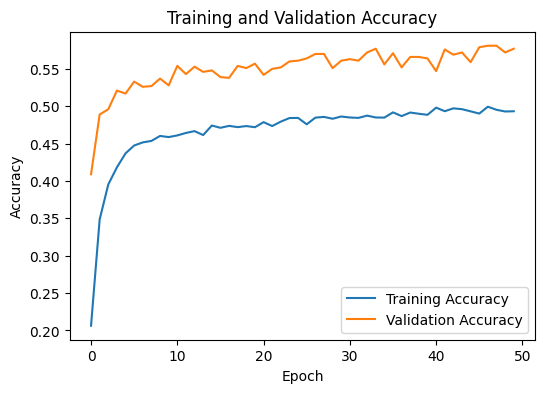

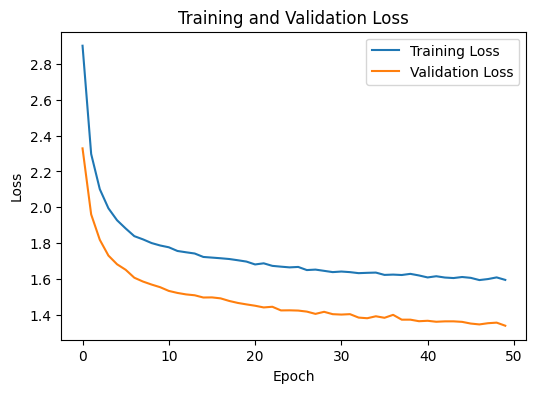

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5773 - loss: 1.3965


[1.3894131183624268, 0.5740000009536743]

### 6 Layer Neural Network

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64]
dropout = [0.1, 0.2, 0.3]
best_accuracy = 0
input_shape = X_train.shape[1:]
best_history = None
best_model = None

for lr in learning_rates:
    for batch in batch_sizes:
        for d in dropout:
            model = Six_Layer_NN()
            config = {
                        'input_shape': input_shape,
                        'epochs': 50,
                        'dropout': d,
                        'batch_size': batch,
                        'lr': lr
                    }
            model.build_model(config)
            history = model.train(X_train, y_train, X_valid, y_valid, config)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"Accuracy: {accuracy:.4f}")

            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch, 'dropout': d}
                best_history = history

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1728 - loss: 3.1767 - val_accuracy: 0.4760 - val_loss: 1.9919
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3832 - loss: 2.2027 - val_accuracy: 0.5140 - val_loss: 1.7549
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4171 - loss: 2.0012 - val_accuracy: 0.5250 - val_loss: 1.6284
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4518 - loss: 1.8686 - val_accuracy: 0.5540 - val_loss: 1.5688
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4622 - loss: 1.8054 - val_accuracy: 0.5430 - val_loss: 1.5236
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4661 - loss: 1.7732 - val_accuracy: 0.5600 - val_loss: 1.4839
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4709 - loss: 1.7483 - val_accuracy: 0.5610 - val_loss: 1.4734
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4726 - loss: 1.72

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1133 - loss: 3.3656 - val_accuracy: 0.4180 - val_loss: 2.2183
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2737 - loss: 2.4675 - val_accuracy: 0.4400 - val_loss: 1.9275
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3263 - loss: 2.2238 - val_accuracy: 0.4820 - val_loss: 1.7790
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3628 - loss: 2.0941 - val_accuracy: 0.4840 - val_loss: 1.7022
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3866 - loss: 2.0151 - val_accuracy: 0.4990 - val_loss: 1.6378
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3972 - loss: 1.9724 - val_accuracy: 0.5090 - val_loss: 1.6038
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4001 - loss: 1.9422 - val_accuracy: 0.4950 - val_loss: 1.5861
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4004 - loss: 1.92

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0905 - loss: 3.5267 - val_accuracy: 0.3750 - val_loss: 2.4199
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2122 - loss: 2.6798 - val_accuracy: 0.4120 - val_loss: 2.1326
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2660 - loss: 2.4104 - val_accuracy: 0.4310 - val_loss: 1.9700
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3000 - loss: 2.2771 - val_accuracy: 0.4540 - val_loss: 1.8616
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3130 - loss: 2.1935 - val_accuracy: 0.4720 - val_loss: 1.7844
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3324 - loss: 2.1359 - val_accuracy: 0.4790 - val_loss: 1.7513
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3362 - loss: 2.1085 - val_accuracy: 0.4830 - val_loss: 1.7175
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3445 - loss: 2.07

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1526 - loss: 3.2465 - val_accuracy: 0.4210 - val_loss: 2.2212
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3418 - loss: 2.3274 - val_accuracy: 0.5030 - val_loss: 1.8427
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4129 - loss: 2.0592 - val_accuracy: 0.5220 - val_loss: 1.6936
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4421 - loss: 1.9251 - val_accuracy: 0.5310 - val_loss: 1.6186
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4697 - loss: 1.8221 - val_accuracy: 0.5520 - val_loss: 1.5512
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4760 - loss: 1.7814 - val_accuracy: 0.5620 - val_loss: 1.5109
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4797 - loss: 1.7375 - val_accuracy: 0.5620 - val_loss: 1.4833
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4928 - loss: 1.70

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1087 - loss: 3.4148 - val_accuracy: 0.3770 - val_loss: 2.3422
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2675 - loss: 2.5476 - val_accuracy: 0.4360 - val_loss: 2.0126
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3304 - loss: 2.2788 - val_accuracy: 0.4900 - val_loss: 1.8436
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3590 - loss: 2.1385 - val_accuracy: 0.5010 - val_loss: 1.7534
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3876 - loss: 2.0366 - val_accuracy: 0.5030 - val_loss: 1.6913
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3962 - loss: 1.9705 - val_accuracy: 0.5050 - val_loss: 1.6440
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4091 - loss: 1.9502 - val_accuracy: 0.5230 - val_loss: 1.6051
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4262 - loss: 1.89

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0885 - loss: 3.5926 - val_accuracy: 0.3470 - val_loss: 2.5711
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1887 - loss: 2.7979 - val_accuracy: 0.4050 - val_loss: 2.2326
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2444 - loss: 2.5173 - val_accuracy: 0.4110 - val_loss: 2.0707
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2846 - loss: 2.3594 - val_accuracy: 0.4240 - val_loss: 1.9597
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3081 - loss: 2.2377 - val_accuracy: 0.4440 - val_loss: 1.8785
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3217 - loss: 2.1771 - val_accuracy: 0.4430 - val_loss: 1.8194
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3174 - loss: 2.1667 - val_accuracy: 0.4490 - val_loss: 1.7673
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3459 - loss: 2.08

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_67               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_70               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3016 - loss: 2.4531 - val_accuracy: 0.4510 - val_loss: 1.7561
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4129 - loss: 1.9578 - val_accuracy: 0.5080 - val_loss: 1.6296
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4339 - loss: 1.8939 - val_accuracy: 0.4950 - val_loss: 1.6867
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4489 - loss: 1.8600 - val_accuracy: 0.5050 - val_loss: 1.6738
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4326 - loss: 1.8810 - val_accuracy: 0.4980 - val_loss: 1.6693
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4374 - loss: 1.8523 - val_accuracy: 0.5090 - val_loss: 1.6183
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4498 - loss: 1.8305 - val_accuracy: 0.5180 - val_loss: 1.6048
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4586 - loss: 1.81

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2560 - loss: 2.5913 - val_accuracy: 0.4330 - val_loss: 1.8655
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3518 - loss: 2.1158 - val_accuracy: 0.4730 - val_loss: 1.7731
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3752 - loss: 2.0664 - val_accuracy: 0.4670 - val_loss: 1.7502
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3836 - loss: 2.0380 - val_accuracy: 0.5010 - val_loss: 1.7214
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3919 - loss: 2.0086 - val_accuracy: 0.4700 - val_loss: 1.7416
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3911 - loss: 2.0128 - val_accuracy: 0.4640 - val_loss: 1.7582
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3879 - loss: 2.0119 - val_accuracy: 0.4780 - val_loss: 1.7408
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3916 - loss: 1.99

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_76               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_77               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_78               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_80               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2062 - loss: 2.7636 - val_accuracy: 0.3640 - val_loss: 1.9408
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2874 - loss: 2.2622 - val_accuracy: 0.3870 - val_loss: 1.9629
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3001 - loss: 2.2265 - val_accuracy: 0.4020 - val_loss: 1.8722
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3103 - loss: 2.2073 - val_accuracy: 0.3940 - val_loss: 1.8504
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3130 - loss: 2.2117 - val_accuracy: 0.4280 - val_loss: 1.8256
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3237 - loss: 2.1738 - val_accuracy: 0.4380 - val_loss: 1.8687
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3198 - loss: 2.1756 - val_accuracy: 0.4260 - val_loss: 1.8493
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3215 - loss: 2.18

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_81               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_82               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_84 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_85 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3094 - loss: 2.4743 - val_accuracy: 0.5000 - val_loss: 1.7378
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4396 - loss: 1.8542 - val_accuracy: 0.5090 - val_loss: 1.6173
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4577 - loss: 1.7918 - val_accuracy: 0.4980 - val_loss: 1.6341
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4643 - loss: 1.7528 - val_accuracy: 0.5290 - val_loss: 1.5102
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4749 - loss: 1.7245 - val_accuracy: 0.5100 - val_loss: 1.5633
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4735 - loss: 1.7341 - val_accuracy: 0.5320 - val_loss: 1.4940
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4810 - loss: 1.7010 - val_accuracy: 0.5360 - val_loss: 1.5221
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4818 - loss: 1.70

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_86 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_89               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2456 - loss: 2.6776 - val_accuracy: 0.4410 - val_loss: 1.8231
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3797 - loss: 2.0396 - val_accuracy: 0.4590 - val_loss: 1.7551
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3862 - loss: 1.9852 - val_accuracy: 0.4970 - val_loss: 1.6644
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4097 - loss: 1.9332 - val_accuracy: 0.4710 - val_loss: 1.7036
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4095 - loss: 1.9258 - val_accuracy: 0.4910 - val_loss: 1.6522
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4185 - loss: 1.9071 - val_accuracy: 0.5010 - val_loss: 1.6370
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4114 - loss: 1.9051 - val_accuracy: 0.4850 - val_loss: 1.6461
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4164 - loss: 1.89

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_95 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1923 - loss: 2.8364 - val_accuracy: 0.3300 - val_loss: 2.0708
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3158 - loss: 2.1831 - val_accuracy: 0.4280 - val_loss: 1.8199
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3247 - loss: 2.1383 - val_accuracy: 0.4090 - val_loss: 1.8908
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3481 - loss: 2.0785 - val_accuracy: 0.4230 - val_loss: 1.8233
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3412 - loss: 2.1026 - val_accuracy: 0.4440 - val_loss: 1.7394
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3468 - loss: 2.0898 - val_accuracy: 0.4490 - val_loss: 1.7702
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3534 - loss: 2.0660 - val_accuracy: 0.4340 - val_loss: 1.7457
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3596 - loss: 2.04

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_96               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_96 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_97               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_97 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_98               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_98 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_99               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_99 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_100              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_100 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2030 - loss: 2.9183 - val_accuracy: 0.2700 - val_loss: 2.6851
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2518 - loss: 2.6439 - val_accuracy: 0.2480 - val_loss: 3.0796
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2563 - loss: 2.6213 - val_accuracy: 0.3070 - val_loss: 2.4564
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2611 - loss: 2.6251 - val_accuracy: 0.3110 - val_loss: 2.5836
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2590 - loss: 2.6363 - val_accuracy: 0.3100 - val_loss: 2.3537
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2703 - loss: 2.5881 - val_accuracy: 0.3030 - val_loss: 2.4828
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2747 - loss: 2.5845 - val_accuracy: 0.2790 - val_loss: 2.6345
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2691 - loss: 2.58

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_101              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_101 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_102              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_102 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_103              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_103 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_104              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_105              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1570 - loss: 3.0537 - val_accuracy: 0.2330 - val_loss: 3.0713
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1833 - loss: 2.8590 - val_accuracy: 0.2180 - val_loss: 2.6432
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1960 - loss: 2.8106 - val_accuracy: 0.2550 - val_loss: 2.5600
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2064 - loss: 2.7980 - val_accuracy: 0.2380 - val_loss: 2.6965
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2119 - loss: 2.7844 - val_accuracy: 0.2610 - val_loss: 2.6448
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2156 - loss: 2.7946 - val_accuracy: 0.1800 - val_loss: 2.8366
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2113 - loss: 2.7849 - val_accuracy: 0.2600 - val_loss: 2.5250
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2223 - loss: 2.78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_106              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_107              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_107 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_108              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_108 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_109              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_109 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_110              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_110 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1240 - loss: 3.1884 - val_accuracy: 0.1620 - val_loss: 2.9504
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1459 - loss: 2.9796 - val_accuracy: 0.1580 - val_loss: 2.9406
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1583 - loss: 2.9421 - val_accuracy: 0.1610 - val_loss: 2.9458
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1701 - loss: 2.9474 - val_accuracy: 0.2210 - val_loss: 2.7800
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1622 - loss: 2.9435 - val_accuracy: 0.1860 - val_loss: 2.6507
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1718 - loss: 2.9005 - val_accuracy: 0.2360 - val_loss: 2.8316
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1603 - loss: 2.9688 - val_accuracy: 0.2070 - val_loss: 2.6570
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1662 - loss: 2.92

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_111              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_111 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_112              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_112 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_113              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_113 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_114              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_114 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_115              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_115 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2302 - loss: 2.7664 - val_accuracy: 0.3510 - val_loss: 2.8479
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2957 - loss: 2.4599 - val_accuracy: 0.3210 - val_loss: 2.6770
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3075 - loss: 2.4468 - val_accuracy: 0.3420 - val_loss: 2.3964
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3220 - loss: 2.3915 - val_accuracy: 0.3340 - val_loss: 2.4171
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3336 - loss: 2.3574 - val_accuracy: 0.3490 - val_loss: 2.3555
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3344 - loss: 2.3599 - val_accuracy: 0.3890 - val_loss: 2.2288
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3390 - loss: 2.3394 - val_accuracy: 0.3470 - val_loss: 2.4673
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3378 - loss: 2.37

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_116              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_116 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_117              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_117 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_118              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_118 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_119              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_119 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_120              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_120 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1819 - loss: 2.9646 - val_accuracy: 0.2160 - val_loss: 2.9670
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2401 - loss: 2.6157 - val_accuracy: 0.2140 - val_loss: 2.7058
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2434 - loss: 2.6267 - val_accuracy: 0.2500 - val_loss: 2.6213
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2505 - loss: 2.6185 - val_accuracy: 0.3410 - val_loss: 2.4186
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2666 - loss: 2.5532 - val_accuracy: 0.3310 - val_loss: 2.4611
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2673 - loss: 2.5649 - val_accuracy: 0.3210 - val_loss: 2.3377
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2787 - loss: 2.5491 - val_accuracy: 0.3500 - val_loss: 2.3099
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2783 - loss: 2.55

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_121              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_121 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_122              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_122 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_123              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_124              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_125              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1458 - loss: 3.0668 - val_accuracy: 0.1870 - val_loss: 2.7679
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1904 - loss: 2.7690 - val_accuracy: 0.2000 - val_loss: 2.6431
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2032 - loss: 2.7721 - val_accuracy: 0.2100 - val_loss: 2.7980
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1931 - loss: 2.7630 - val_accuracy: 0.2920 - val_loss: 2.6222
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2134 - loss: 2.7471 - val_accuracy: 0.2310 - val_loss: 2.5261
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2122 - loss: 2.7403 - val_accuracy: 0.2700 - val_loss: 2.4969
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2226 - loss: 2.6977 - val_accuracy: 0.3000 - val_loss: 2.3506
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2200 - loss: 2.70

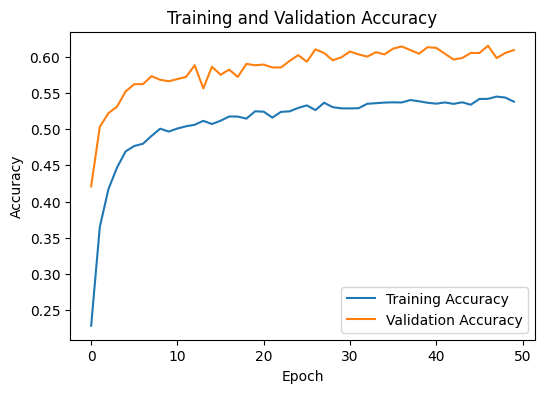

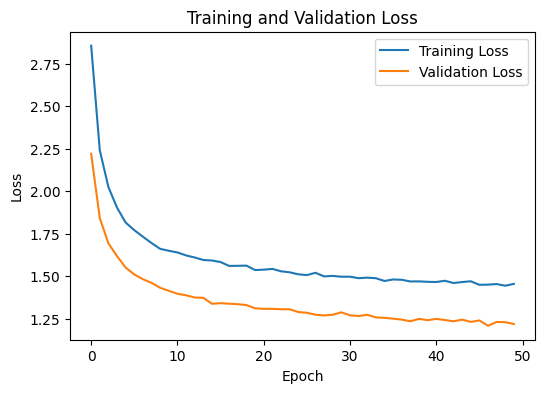

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6100 - loss: 1.2808


[1.27437162399292, 0.6039999723434448]

### 10 Layer Neural Network

In [ ]:
learning_rates = [0.001, 0.01,0.0001]
batch_sizes = [32, 64]
dropout = [0.1,0.2]
best_accuracy = 0
input_shape = X_train.shape[1:]
best_history = None
best_model = None

for lr in learning_rates:
    for batch in batch_sizes:
        for d in dropout:
            model = Ten_Layer_NN()
            config = {
                        'input_shape': input_shape,
                        'epochs': 50,
                        'dropout': d,
                        'batch_size': batch,
                        'lr': lr
                    }
            model.build_model(config)
            history = model.train(X_train, y_train, X_valid, y_valid, config)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"Accuracy: {accuracy:.4f}")

            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch, 'dropout': d}
                best_history = history

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_126              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_127              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_128              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_128 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_129              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_129 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_130              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_131              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_130 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1039 - loss: 3.4464 - val_accuracy: 0.2840 - val_loss: 2.4897
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2492 - loss: 2.6182 - val_accuracy: 0.4170 - val_loss: 2.0357
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3261 - loss: 2.3207 - val_accuracy: 0.4690 - val_loss: 1.8317
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3502 - loss: 2.1546 - val_accuracy: 0.5010 - val_loss: 1.7345
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3849 - loss: 2.0567 - val_accuracy: 0.5110 - val_loss: 1.6658
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3992 - loss: 2.0023 - val_accuracy: 0.5320 - val_loss: 1.6228
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4141 - loss: 1.9537 - val_accuracy: 0.5250 - val_loss: 1.5884
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4233 - loss: 1.9

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_166 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_135              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_134 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_136              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_135 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_137              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_136 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_138              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_137 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_139              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_140              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_138 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0652 - loss: 3.6193 - val_accuracy: 0.2160 - val_loss: 2.6899
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1364 - loss: 2.8716 - val_accuracy: 0.2640 - val_loss: 2.4207
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1969 - loss: 2.6125 - val_accuracy: 0.3030 - val_loss: 2.2435
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2173 - loss: 2.4785 - val_accuracy: 0.3220 - val_loss: 2.1304
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2494 - loss: 2.3779 - val_accuracy: 0.3550 - val_loss: 2.0285
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2502 - loss: 2.3063 - val_accuracy: 0.3630 - val_loss: 1.9734
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2790 - loss: 2.2437 - val_accuracy: 0.4030 - val_loss: 1.8944
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2960 - loss: 2.2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_176 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_144              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_142 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_145              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_143 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_146              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_144 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_147              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_145 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_148              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_149              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_146 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0837 - loss: 3.4780 - val_accuracy: 0.2820 - val_loss: 2.5967
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2366 - loss: 2.6812 - val_accuracy: 0.3750 - val_loss: 2.1362
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3069 - loss: 2.3918 - val_accuracy: 0.4480 - val_loss: 1.9425
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3446 - loss: 2.2142 - val_accuracy: 0.4790 - val_loss: 1.8183
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3786 - loss: 2.1020 - val_accuracy: 0.5040 - val_loss: 1.7367
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3948 - loss: 2.0290 - val_accuracy: 0.5150 - val_loss: 1.6753
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4021 - loss: 1.9782 - val_accuracy: 0.5290 - val_loss: 1.6197
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4242 - loss: 1.93

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_153              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_150 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_154              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_151 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_155              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_152 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_156              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_153 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_157              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_158              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_154 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0654 - loss: 3.6842 - val_accuracy: 0.2330 - val_loss: 2.8401
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1357 - loss: 2.9722 - val_accuracy: 0.3030 - val_loss: 2.3648
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1888 - loss: 2.6483 - val_accuracy: 0.3310 - val_loss: 2.2186
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2266 - loss: 2.5008 - val_accuracy: 0.3730 - val_loss: 2.1142
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2522 - loss: 2.4020 - val_accuracy: 0.3770 - val_loss: 2.0370
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2746 - loss: 2.3296 - val_accuracy: 0.3830 - val_loss: 1.9656
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2839 - loss: 2.2631 - val_accuracy: 0.4040 - val_loss: 1.9207
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3028 - loss: 2.20

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_196 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_162              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_158 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_163              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_159 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_164              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_160 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_165              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_161 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_166              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_167              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_162 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2013 - loss: 2.7465 - val_accuracy: 0.3530 - val_loss: 2.0509
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3146 - loss: 2.1717 - val_accuracy: 0.4330 - val_loss: 1.8810
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3406 - loss: 2.1291 - val_accuracy: 0.4170 - val_loss: 1.9342
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3554 - loss: 2.0884 - val_accuracy: 0.4490 - val_loss: 1.8282
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3755 - loss: 2.0469 - val_accuracy: 0.4710 - val_loss: 1.7539
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3789 - loss: 2.0443 - val_accuracy: 0.4730 - val_loss: 1.8405
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3925 - loss: 2.0220 - val_accuracy: 0.4470 - val_loss: 1.7660
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3989 - loss: 1.9

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)